In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append('..')
import bets
import os
import glob
import datetime as dt
import time
#import ot
import json
import requests
import statsmodels.api as sm 
from tqdm import tqdm
pd.set_option('display.float_format', lambda x: '%.3f' % x)

nba = bets.nba()
import seaborn as sns
import matplotlib.pyplot as plt
import re
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
from nba_api.stats.endpoints import leaguegamefinder,BoxScoreSummaryV2,LeagueDashOppPtShot,PlayerProfileV2,GameRotation,LeagueDashPlayerShotLocations

In [3]:
# want to get all of '16 as this will fill in '17 start, which will be the beginning of our dataset

In [4]:
def update_view(viewName,file):
    try:
        nba.conn.execute('DROP VIEW {}'.format(viewName))
        nba.conn.commit()
    except:
        '{} does not exist'.format(viewName)
    nba.conn.execute(open(file,'r').read())
    nba.conn.commit()
    print('{} View has been updated'.format(viewName))

In [1325]:
data = nba.threeData()
data = data[data.season > '2016-17'].reset_index(drop=True)
#going through the columns to fix
##all daysBetween are the first game, will treat the first game with the 9 days this is the all-star break 
#opp Days last game is similar with some players playing their second vs a teams first also 9

data.daysBetweenGames = data.daysBetweenGames.fillna(9)
data.oppDaysLastGame = data.oppDaysLastGame.fillna(9)
naCols = nba.naInfo(data,'game_date')
for col in naCols:
    if col not in ['daysBetweenGames','oppDaysLastGame','ra_fga','paint_fga','lc_fga','rc_fga','abv_fga','mid_fga']:
        data[col] = data.groupby('player_id')[col].ffill()

60 columns have nans
mvAvgThrees:
missing:1,390-1.84%
unique:215-15.47%
	
mvAvgUsage:
missing:2,068-2.73%
unique:225-10.88%
	
mvAvgOffRating:
missing:2,068-2.73%
unique:225-10.88%
	
mvAvgFtPrct:
missing:4,421-5.84%
unique:971-21.96%
	
mvAvgThrPtPrct:
missing:1,653-2.18%
unique:313-18.94%
	
seasonUsage:
missing:1,390-1.84%
unique:215-15.47%
	
seasonOffRating:
missing:1,390-1.84%
unique:215-15.47%
	
seasonFtPrct:
missing:2,771-3.66%
unique:534-19.27%
	
seasonThrPtPrct:
missing:1,645-2.17%
unique:306-18.60%
	
careerFtPrct:
missing:891-1.18%
unique:301-33.78%
	
careerThrPtPrct:
missing:483-0.64%
unique:174-36.02%
	
careerUsage:
missing:332-0.44%
unique:120-36.14%
	
careerOffRating:
missing:332-0.44%
unique:120-36.14%
	
careerAvgThrees:
missing:332-0.44%
unique:120-36.14%
	
mvAvgOppPace:
missing:968-1.28%
unique:21-2.17%
	
mvAvgOppOpen3:
missing:968-1.28%
unique:21-2.17%
	
mvAvgOppWide3:
missing:968-1.28%
unique:21-2.17%
	
mvAvgOppDefRating:
missing:968-1.28%
unique:21-2.17%
	
seasonOppOpen

In [1331]:
d.threesMade.values

array([0, 2, 0, ..., 3, 1, 0])

In [ ]:
sm.OLS(

In [1336]:
d = data.dropna(subset=['careerAvgThrees'])
model = sm.OLS(endog=d.threesMade,exog=d.careerAvgThrees)

In [1337]:
res = model.fit()

In [1338]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             threesMade   R-squared (uncentered):                   0.624
Model:                            OLS   Adj. R-squared (uncentered):              0.624
Method:                 Least Squares   F-statistic:                          1.250e+05
Date:                Sun, 13 Oct 2024   Prob (F-statistic):                        0.00
Time:                        09:13:53   Log-Likelihood:                     -1.3923e+05
No. Observations:               75361   AIC:                                  2.785e+05
Df Residuals:                   75360   BIC:                                  2.785e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
careerAvgThrees     1.0532      0.003    353.580      0.000       1.047       1.059
==============================================================================
Omnibus:                     8796.326   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13444.378
Skew:                           0.855   Prob(JB):                         0.00
Kurtosis:                       4.165   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1341]:
d

threesMade  wghtThr
0               0    1.683
1               1    1.460
2               2    1.267
3               1    2.953
4               4    1.617
...           ...      ...
75688           2    1.551
75689           1    0.845
75690           3    2.902
75691           1    0.983
75692           0    2.063

[75692 rows x 2 columns]

In [1350]:
params = [i for i in range(20,200,20)]
for col in X.columns:
    print('Test on {}'.format(col))
    #temp = data.groupby('player_id').threesMade.ewm(span=param,adjust = True).mean().shift(1).reset_index(name='wghtThr')[['level_1','wghtThr']].set_index('level_1')
    d = data.dropna()
    ols = sm.OLS(endog = d.threesMade,exog = d[col])
    model = ols.fit()
    print(model.summary(),'\n')
    


Test on height
                                 OLS Regression Results                                
Dep. Variable:             threesMade   R-squared (uncentered):                   0.578
Model:                            OLS   Adj. R-squared (uncentered):              0.578
Method:                 Least Squares   F-statistic:                          1.009e+05
Date:                Sun, 13 Oct 2024   Prob (F-statistic):                        0.00
Time:                        09:22:12   Log-Likelihood:                     -1.4072e+05
No. Observations:               73668   AIC:                                  2.814e+05
Df Residuals:                   73667   BIC:                                  2.815e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [1317]:
data.groupby('player_id').threesMade.ewm(span=param[0],adjust = param[1]).mean().shift(1).reset_index(name='wghtThr')[['level_1','wghtThr']].set_index('level

wghtThr
level_1         
20           NaN
131        2.000
433        1.905
559        1.862
691        1.821
...          ...
48215      1.389
48514      1.322
48732      1.307
51081      1.245
51240      1.186

[75693 rows x 1 columns]

In [1307]:
data.loc[20]

threesMade                         2
name                 Marvin Williams
player_id                     101107
game_id                   0021700003
game_date                 2017-10-18
                          ...       
abv_fgallowedrth              20.500
abv_fgallowedfth              23.000
abv_fgallowedxth              37.000
abv_fgallowedskew              1.784
abv_fgallowedkurt              4.412
Name: 20, Length: 131, dtype: object

In [1186]:
lgDefValues = pd.read_sql('''select season, sum(open_fg3a) * 1.0 / (sum(abv_fga) + sum(lc_fga) + sum(rc_fga))  open_fg3aSeason,
                    sum(wide_fg3a) * 1.0 / (sum(abv_fga) + sum(lc_fga) + sum(rc_fga))  wide_fg3aSeason,
                    avg(pace) as paceSeason,
                    avg(def_rate) as def_rateSeason



                from team_def
                group by season
            
            ''' ,nba.conn).set_index('season').shift(1)

Will update all three/ft columns with career counterparts  
will go through each year and update the moving averages with the prior year's value

In [1187]:
data.mvAvgThrees = np.where(data.mvAvgThrees.isna(),data.careerAvgThrees,data.mvAvgThrees)
data.mvAvgUsage = np.where(data.mvAvgUsage.isna(),data.careerUsage,data.mvAvgUsage)
data.mvAvgOffRating = np.where(data.mvAvgOffRating.isna(),data.careerOffRating,data.mvAvgOffRating)
data.mvAvgFtPrct = np.where(data.mvAvgFtPrct.isna(),data.careerFtPrct,data.mvAvgFtPrct)
data.mvAvgThrPtPrct = np.where(data.mvAvgThrPtPrct.isna(),data.careerThrPtPrct,data.mvAvgThrPtPrct)
data.seasonUsage = np.where(data.seasonUsage.isna(),data.careerUsage,data.seasonUsage)
data.seasonOffRating = np.where(data.seasonOffRating.isna(),data.careerOffRating,data.seasonOffRating)
data.seasonFtPrct = np.where(data.seasonFtPrct.isna(),data.careerFtPrct,data.seasonFtPrct)
data.seasonThrPtPrct = np.where(data.seasonThrPtPrct.isna(),data.careerThrPtPrct,data.seasonThrPtPrct)

data = data.merge(lgDefValues,how='left',on=['season'])
data.mvAvgOppPace = np.where(data.mvAvgOppPace.isna(),data.paceSeason,data.mvAvgOppPace)
data.seasonOppPace = np.where(data.seasonOppPace.isna(),data.paceSeason,data.seasonOppPace)
data.mvAvgOppOpen3 = np.where(data.mvAvgOppOpen3.isna(),data.open_fg3aSeason,data.mvAvgOppOpen3)
data.seasonOppOpen3 = np.where(data.seasonOppOpen3.isna() ,data.open_fg3aSeason,data.seasonOppOpen3)
data.seasonOppWide3 = np.where(data.seasonOppWide3.isna(),data.wide_fg3aSeason,data.seasonOppWide3)
data.mvAvgOppWide3 = np.where(data.mvAvgOppWide3.isna(),data.wide_fg3aSeason,data.mvAvgOppWide3)
data.mvAvgOppDefRating = np.where(data.mvAvgOppDefRating.isna(),data.def_rateSeason,data.mvAvgOppDefRating)
data.seasonOppDefRating = np.where(data.seasonOppDefRating.isna(),data.def_rateSeason,data.seasonOppDefRating)
data.drop(lgDefValues.columns,axis=1,inplace=True)

data['wghtThrees'] = 

In [1189]:
nba.naInfo(data,'plyrGameCt')

54 columns have nans
mvAvgThrees:
missing:332-0.44%
unique:1-0.30%
	
mvAvgUsage:
missing:332-0.44%
unique:1-0.30%
	
mvAvgOffRating:
missing:332-0.44%
unique:1-0.30%
	
mvAvgFtPrct:
missing:638-0.84%
unique:12-1.88%
	
mvAvgThrPtPrct:
missing:419-0.55%
unique:8-1.91%
	
seasonUsage:
missing:332-0.44%
unique:1-0.30%
	
seasonOffRating:
missing:332-0.44%
unique:1-0.30%
	
seasonFtPrct:
missing:638-0.84%
unique:12-1.88%
	
seasonThrPtPrct:
missing:419-0.55%
unique:8-1.91%
	
careerFtPrct:
missing:638-0.84%
unique:12-1.88%
	
careerThrPtPrct:
missing:419-0.55%
unique:8-1.91%
	
careerUsage:
missing:332-0.44%
unique:1-0.30%
	
careerOffRating:
missing:332-0.44%
unique:1-0.30%
	
careerAvgThrees:
missing:332-0.44%
unique:1-0.30%
	
ra_fgast:
missing:1,668-2.20%
unique:6-0.36%
	
ra_fgand:
missing:1,668-2.20%
unique:6-0.36%
	
ra_fgard:
missing:1,668-2.20%
unique:6-0.36%
	
ra_fgarth:
missing:1,668-2.20%
unique:6-0.36%
	
ra_fgafth:
missing:1,668-2.20%
unique:6-0.36%
	
ra_fgaxth:
missing:1,668-2.20%
unique:6-

['mvAvgThrees',
 'mvAvgUsage',
 'mvAvgOffRating',
 'mvAvgFtPrct',
 'mvAvgThrPtPrct',
 'seasonUsage',
 'seasonOffRating',
 'seasonFtPrct',
 'seasonThrPtPrct',
 'careerFtPrct',
 'careerThrPtPrct',
 'careerUsage',
 'careerOffRating',
 'careerAvgThrees',
 'ra_fgast',
 'ra_fgand',
 'ra_fgard',
 'ra_fgarth',
 'ra_fgafth',
 'ra_fgaxth',
 'ra_fgaskew',
 'ra_fgakurt',
 'paint_fgast',
 'paint_fgand',
 'paint_fgard',
 'paint_fgarth',
 'paint_fgafth',
 'paint_fgaxth',
 'paint_fgaskew',
 'paint_fgakurt',
 'mid_fgast',
 'mid_fgand',
 'mid_fgard',
 'mid_fgarth',
 'mid_fgafth',
 'mid_fgaxth',
 'mid_fgaskew',
 'mid_fgakurt',
 'crn_fgast',
 'crn_fgand',
 'crn_fgard',
 'crn_fgarth',
 'crn_fgafth',
 'crn_fgaxth',
 'crn_fgaskew',
 'crn_fgakurt',
 'abv_fgast',
 'abv_fgand',
 'abv_fgard',
 'abv_fgarth',
 'abv_fgafth',
 'abv_fgaxth',
 'abv_fgaskew',
 'abv_fgakurt']

In [1190]:
data.fillna(0,inplace=True)

In [1081]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold


In [1193]:
tpDF

0     1     2     3     4     5     6     7     8     9    10    11  \
0     0.460 0.230 0.160 0.060 0.060 0.030 0.000 0.000 0.000 0.000 0.000 0.000   
1     0.250 0.280 0.230 0.170 0.060 0.000 0.010 0.000 0.000 0.000 0.000 0.000   
2     0.310 0.240 0.190 0.160 0.080 0.020 0.000 0.000 0.000 0.000 0.000 0.000   
3     0.310 0.220 0.230 0.160 0.060 0.020 0.000 0.000 0.000 0.000 0.000 0.000   
4     0.260 0.420 0.220 0.030 0.060 0.000 0.000 0.010 0.000 0.000 0.000 0.000   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
11304 0.110 0.260 0.190 0.210 0.130 0.040 0.040 0.010 0.010 0.000 0.000 0.000   
11305 0.070 0.230 0.220 0.190 0.150 0.080 0.040 0.020 0.000 0.000 0.000 0.000   
11306 0.100 0.260 0.230 0.210 0.160 0.010 0.000 0.020 0.010 0.000 0.000 0.000   
11307 0.080 0.210 0.220 0.170 0.150 0.060 0.070 0.030 0.010 0.000 0.000 0.000   
11308 0.060 0.230 0.310 0.120 0.200 0.030 0.040 0.000 0.000 0.010 0.000 0.000   

         12    13  probOccur+  probExact  actuals          name   game_date  \
0     0.000 0.000       0.460      0.460        0    Chris Paul  2022-10-19   
1     0.000 0.000       0.250      0.250        0    Chris Paul  2022-10-21   
2     0.000 0.000       0.690      0.240        1    Chris Paul  2022-10-23   
3     0.000 0.000       0.080      0.060        4    Chris Paul  2022-10-25   
4     0.000 0.000       0.260      0.260        0    Chris Paul  2022-10-28   
...     ...   ...         ...        ...      ...           ...         ...   
11304 0.000 0.000       0.890      0.260        1  LeBron James  2023-04-02   
11305 0.000 0.000       0.480      0.190        3  LeBron James  2023-04-04   
11306 0.000 0.000       0.200      0.160        4  LeBron James  2023-04-05   
11307 0.000 0.000       0.490      0.170        3  LeBron James  2023-04-07   
11308 0.000 0.000       0.010      0.000        8  LeBron James  2023-04-09   

       careerAvgThrees  
0                1.618  
1                1.623  
2                1.603  
3                1.595  
4                1.587  
...                ...  
11304            2.598  
11305            2.602  
11306            2.597  
11307            2.617  
11308            2.612  

[11309 rows x 20 columns]

In [1082]:
prcts = data.threesMade.describe(percentiles = np.arange(.05,1,.05))[4:-1]


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


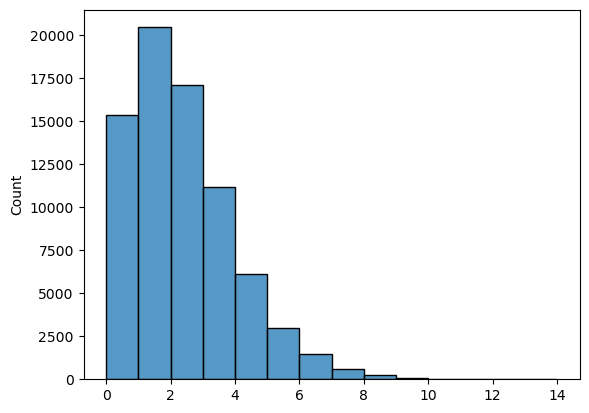

In [1083]:
#what are the distribution of of threes made
sns.histplot(data.threesMade.values,binwidth=1)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


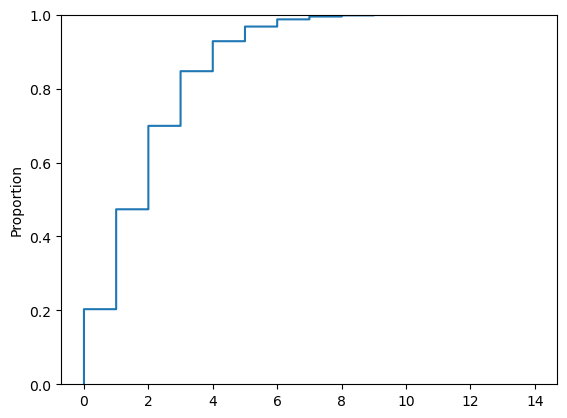

In [1085]:
sns.ecdfplot(data.threesMade.values)
plt.show()

In [1086]:
data.threesMade.describe(percentiles = np.arange(.05,1,.05))

count   75693.000
mean        1.902
std         1.623
min         0.000
5%          0.000
10%         0.000
15%         0.000
20%         0.000
25%         1.000
30%         1.000
35%         1.000
40%         1.000
45%         1.000
50%         2.000
55%         2.000
60%         2.000
65%         2.000
70%         3.000
75%         3.000
80%         3.000
85%         4.000
90%         4.000
95%         5.000
max        14.000
Name: threesMade, dtype: float64

In [1087]:
data.threesMade.value_counts(normalize=True) *100

threesMade
1    27.028
2    22.574
0    20.319
3    14.787
4     8.116
5     3.962
6     1.947
7     0.760
8     0.317
9     0.106
10    0.050
11    0.026
12    0.004
13    0.003
14    0.001
Name: proportion, dtype: float64

In [1088]:
(data.threesMade  >= round(data.careerAvgThrees+.5,0)).sum()

35516

In [1093]:
#how often is someone 1,2,3 over their average? 
data[(data.threesMade  >= round(data.careerAvgThrees+1.5,0)) & (data.game_date>='2018-01-01')].season.value_counts()

season
2023-24    3082
2021-22    2917
2022-23    2803
2020-21    2693
2019-20    2495
2018-19    2403
2017-18    1337
Name: count, dtype: int64

In [789]:
data[(data.threesMade  >= round(data.careerAvgThrees+1.5,0)) & (data.game_date>='2018-01-01')].season.value_counts()

season
2023-24    3075
2021-22    2907
2022-23    2782
2020-21    2655
2019-20    2472
2018-19    2369
2017-18    1321
Name: count, dtype: int64

In [1413]:
idCols = ['name', 'team', 'game_number', 'season', 'player_id', 'team_id','opp_id',
       'game_id', 'game_date','teamfirst10','plyrGameCt','tmGameCt']
fgaCols = ['abv_fga','crn_fga','mid_fga','ra_fga','paint_fga']  
X = final.filter([col for col in final.columns if col not in idCols+['threesMade']])
y = final.threesMade


In [1096]:
X

height  exp    age  daysBetweenGames  gamesInFive  gamesInThree  \
0          80   12 31.324             9.000            1             1   
1          80   12 31.324             1.000            2             2   
2          80   12 31.324             4.000            1             1   
3          80   12 31.324             1.000            2             2   
4          80   12 31.324             1.000            3             2   
...       ...  ...    ...               ...          ...           ...   
75688      81   20 38.790             0.000            3             2   
75689      81   20 38.790             2.000            3             1   
75690      81   20 38.790             2.000            2             1   
75691      81   20 38.790             2.000            2             1   
75692      81   20 38.790             1.000            2             2   

       oppGamesFive  oppGamesThree  oppDaysLastGame  home  ...  \
0                 1              1            9.000     1  ...   
1                 2              2            1.000     0  ...   
2                 3              2            1.000     0  ...   
3                 3              2            1.000     0  ...   
4                 2              2            1.000     0  ...   
...             ...            ...              ...   ...  ...   
75688             3              2            0.000     1  ...   
75689             3              1            2.000     0  ...   
75690             3              2            1.000     0  ...   
75691             3              2            1.000     1  ...   
75692             3              2            1.000     1  ...   

       crn_fgallowedskew  crn_fgallowedkurt  abv_fgallowedst  abv_fgallowednd  \
0                  0.000              0.000            0.000            0.000   
1                  0.000              0.000            0.000            0.000   
2                  0.000              0.000            0.000            0.000   
3                 -0.518             -1.687           18.500           22.500   
4                  0.920              0.317           19.500           20.000   
...                  ...                ...              ...              ...   
75688              1.022              0.617           19.500           21.500   
75689              0.719             -0.536           22.500           23.000   
75690             -0.228             -0.043           22.500           23.500   
75691              0.380             -0.917           23.500           24.000   
75692              0.613              0.618           27.000           28.000   

       abv_fgallowedrd  abv_fgallowedrth  abv_fgallowedfth  abv_fgallowedxth  \
0                0.000             0.000             0.000             0.000   
1                0.000             0.000             0.000             0.000   
2                0.000             0.000             0.000             0.000   
3               24.000            25.000            28.000            30.000   
4               20.000            21.500            25.500            28.000   
...                ...               ...               ...               ...   
75688           25.000            28.000            29.500            33.000   
75689           24.000            25.000            26.500            35.000   
75690           26.000            30.000            31.000            38.000   
75691           26.000            28.500            30.500            35.000   
75692           29.000            30.000            31.500            34.000   

       abv_fgallowedskew  abv_fgallowedkurt  
0                  0.000              0.000  
1                  0.000              0.000  
2                  0.000              0.000  
3                 -0.323              0.047  
4                  1.462              1.671  
...                  ...                ...  
75688             -0.206             -0.777  
75689              0.46

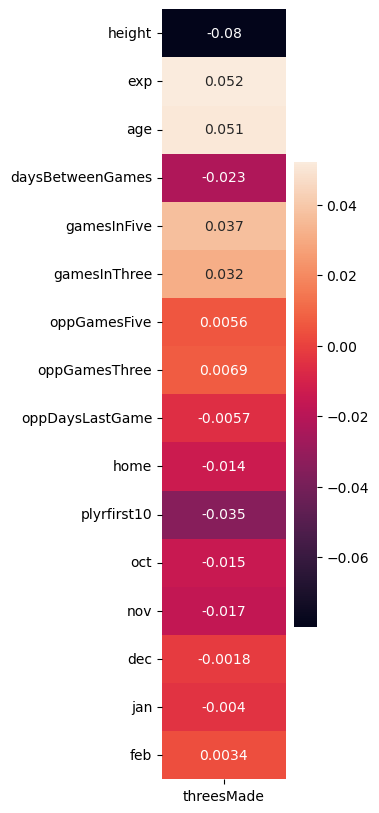

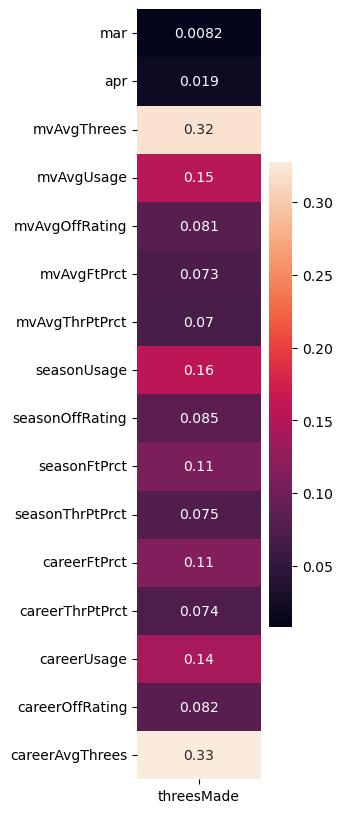

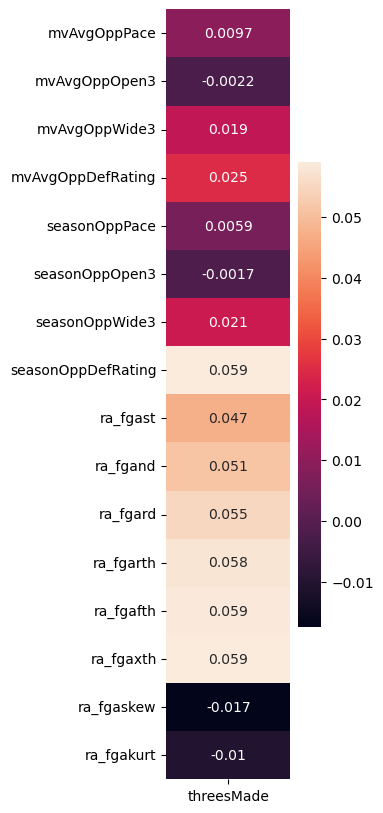

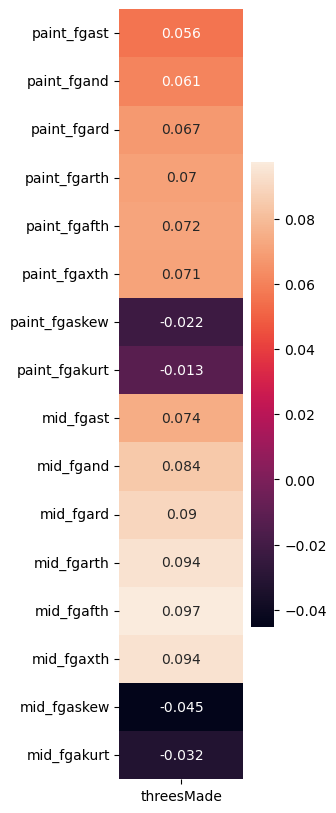

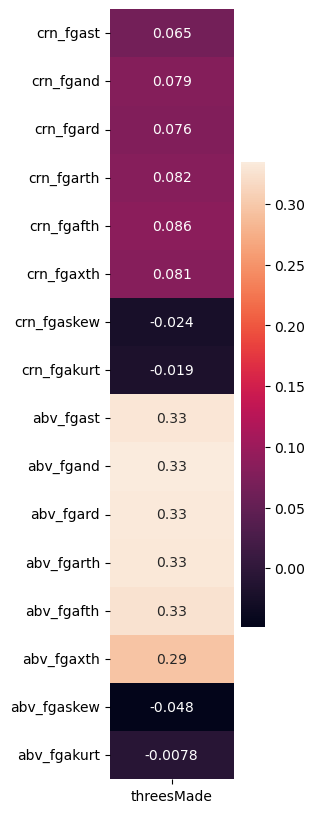

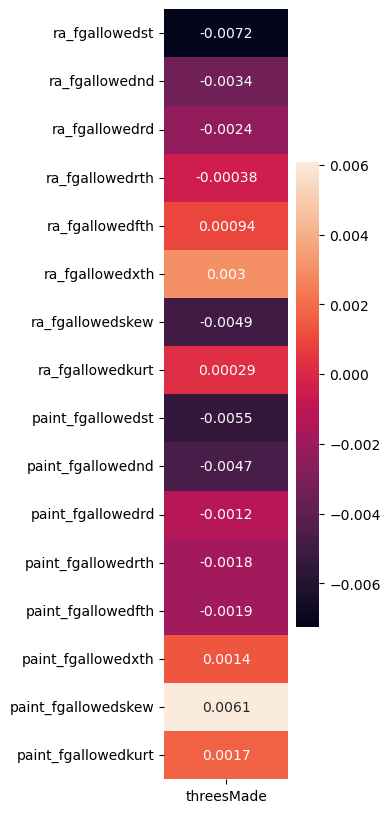

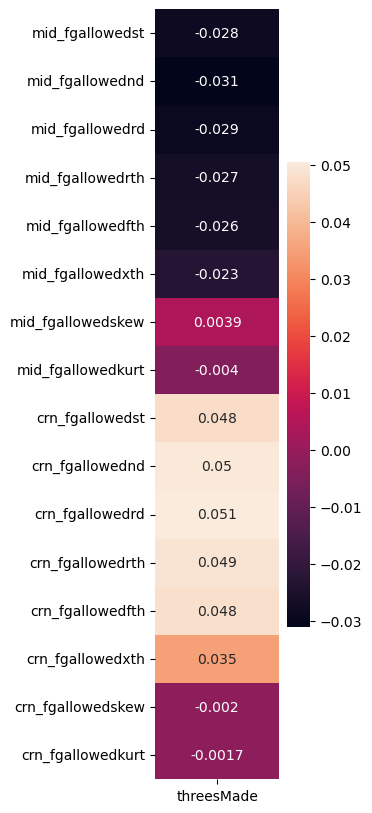

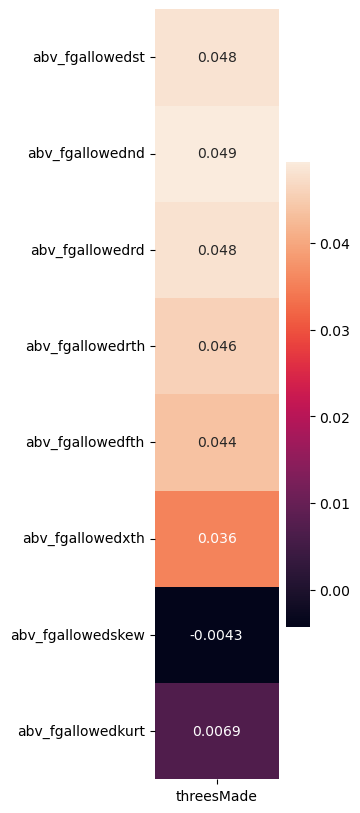

In [1097]:
for iter in range(int(len(final.columns) / 16)):
    cols = X.columns[iter*16:iter*16+16]
    plt.figure(figsize=(2,10))
    sns.heatmap(X.filter(cols).join(y).corr()[['threesMade']].drop('threesMade'),annot=True)
    plt.show()

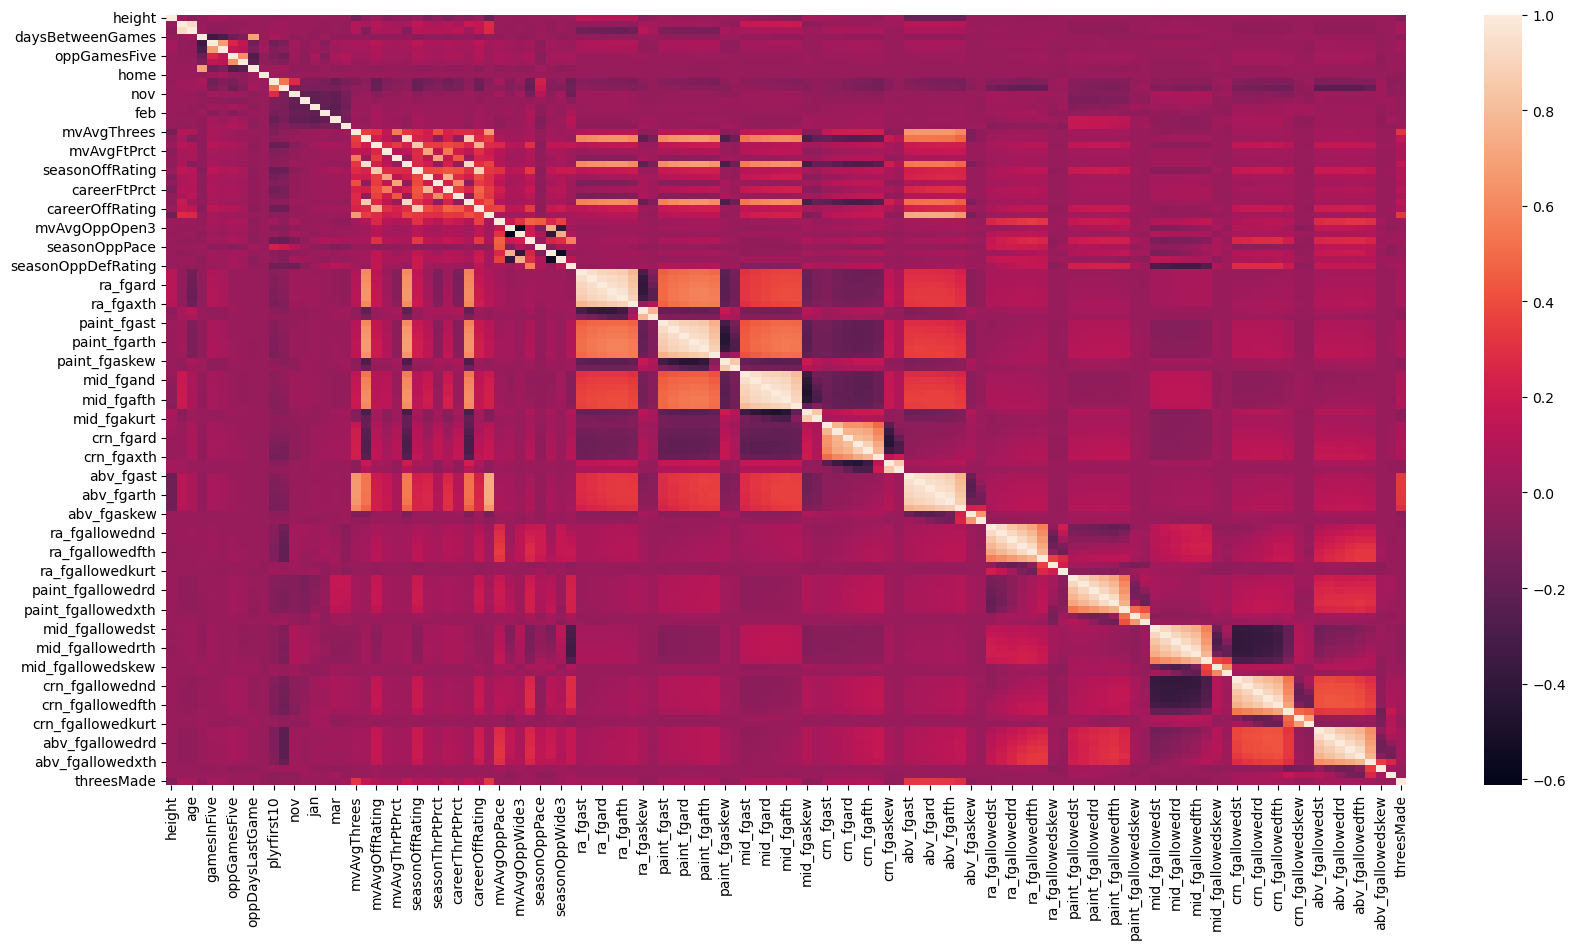

In [1098]:
plt.figure(figsize=(20,10))
sns.heatmap(X.join(y).corr())
plt.show()

In [1796]:
trainInd = data[(data.game_date < '2022-10-01')].index

In [1797]:
trainInd

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       60446, 60447, 60448, 60449, 60450, 60451, 60452, 60453, 60454, 60455],
      dtype='int64', length=60456)

In [1798]:
testInd = data[(data.game_date > '2022-10-01') & (data.game_date < '2023-10-01')].index

In [1799]:
testInd

Index([60456, 60457, 60458, 60459, 60460, 60461, 60462, 60463, 60464, 60465,
       ...
       71857, 71858, 71859, 71860, 71861, 71862, 71863, 71864, 71865, 71866],
      dtype='int64', length=11411)

In [1793]:
valInd = data[(data.game_date > '2023-10-01')].index

In [1791]:
data

threesMade               name player_id     game_id   game_date  \
0               2      Channing Frye    101112  0021600001  2016-10-25   
1               2      Manu Ginobili      1938  0021600003  2016-10-25   
2               1       Kevin Durant    201142  0021600003  2016-10-25   
3               2         Kevin Love    201567  0021600001  2016-10-25   
4               0       Courtney Lee    201584  0021600001  2016-10-25   
...           ...                ...       ...         ...         ...   
84201           2     Andrew Wiggins    203952  0022301198  2024-04-14   
84202           1        Dario Saric    203967  0022301198  2024-04-14   
84203           3  Bogdan Bogdanovic    203992  0022301188  2024-04-14   
84204           1     Vasilije Micic    203995  0022301187  2024-04-14   
84205           0       LeBron James      2544  0022301195  2024-04-14   

        season team  height  exp    age  ...  ra_fgallowedskew  \
0      2016-17  CLE      84   11 33.415  ...               NaN   
1      2016-17  SAS      78   17 39.217  ...               NaN   
2      2016-17  GSW      83    9 28.044  ...               NaN   
3      2016-17  CLE      80    8 28.104  ...               NaN   
4      2016-17  NYK      77    8 31.034  ...               NaN   
...        ...  ...     ...  ...    ...  ...               ...   
84201  2023-24  GSW      79    9 28.641  ...             0.345   
84202  2023-24  GSW      82    9 29.520  ...             0.345   
84203  2023-24  ATL      77    9 31.157  ...             0.102   
84204  2023-24  CHA      75    9 29.752  ...            -0.450   
84205  2023-24  LAL      81   20 38.790  ...            -0.350   

       ra_fgallowedkurt  paint_fgallowedskew  paint_fgallowedkurt  \
0                   NaN                  NaN                  NaN   
1                   NaN                  NaN                  NaN   
2                   NaN                  NaN                  NaN   
3                   NaN                  NaN                  NaN   
4                   NaN                  NaN                  NaN   
...                 ...                  ...                  ...   
84201            -0.741               -0.545                0.083   
84202            -0.741               -0.545                0.083   
84203            -1.206                1.047                0.413   
84204             0.495                0.867                0.151   
84205             0.962                2.344                6.771   

       mid_fgallowedskew  mid_fgallowedkurt  crn_fgallowedskew  \
0                    NaN                NaN                NaN   
1                    NaN                NaN                NaN   
2                    NaN                NaN                NaN   
3                    NaN                NaN                NaN   
4                    NaN                NaN                NaN   
...                  ...                ...                ...   
84201              0.352              1.009              0.321   
84202              0.352              1.009              0.321   
84203              0.456             -0.203              0.580   
84204             -0.531              0.665              0.515   
84205              0.395              0.099              0.613   

       crn_fgallowedkurt  abv_fgallowedskew  abv_fgallowedkurt  
0                    NaN                NaN                NaN  
1                    NaN                NaN                NaN  
2                    NaN                NaN                NaN  
3                    NaN                NaN                NaN  
4                    NaN                NaN                NaN  
...                  ...                ...                ...  
84201             -0.877              1.161              1.807  
84202             -0.877              1.161              1.807  
84203             -1.023              1.527              3.132  
84204             -0.681              0.778          

In [1102]:
trainInd.shape[0] / X.shape[0]

0.6858648522446802

In [1103]:
testInd.shape[0] / X.shape[0]

0.15087719298245614

In [1104]:
valInd.shape[0] / X.shape[0]

0.16325795477286373

In [1412]:
X_train,X_test,X_val,y_train,y_test,y_val = X.loc[trainInd],X.loc[testInd],X.loc[valInd],y.loc[trainInd],y.loc[testInd],y.loc[valInd]

In [1106]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [1107]:
tProbs = rfc.predict_proba(X_test)

In [1115]:
tpDF = pd.DataFrame(tProbs)

In [1200]:
tProbs

array([[0.46, 0.23, 0.16, ..., 0.  , 0.  , 0.  ],
       [0.25, 0.28, 0.23, ..., 0.  , 0.  , 0.  ],
       [0.31, 0.24, 0.19, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.1 , 0.26, 0.23, ..., 0.  , 0.  , 0.  ],
       [0.08, 0.21, 0.22, ..., 0.  , 0.  , 0.  ],
       [0.06, 0.23, 0.31, ..., 0.  , 0.  , 0.  ]])

In [1213]:
tpDF = probDf(tProbs,y_test,data[['name','game_date']],testInd)

In [1123]:
##retrain without the distributions
nonDistCols = [col for col in X.columns if re.search('st$|fth$|nd$|rd$|rth$|xth$|oct|nov|dec|jan|feb|mar|apr',col)==None]

In [1124]:
rfcNonD = RandomForestClassifier()

In [1125]:
rfcNonD.fit(X_train.filter(nonDistCols),y_train)

RandomForestClassifier()

In [1214]:
nonDProbs = rfcNonD.predict_proba(X_test.filter(nonDistCols))
nonDF = probDf(nonDProbs,y_test,data[['name','game_date']],testInd)

In [1127]:
import statsmodels as sm

In [1128]:
from sklearn.preprocessing import StandardScaler,Normalizer

In [1129]:
ss = StandardScaler()
norm = Normalizer()

In [1671]:
x_train_scale = X.loc[trainInd].filter(nonDistCols)
scaleCols = ['mvAvgThrees', 'mvAvgUsage', 'mvAvgOffRating', 'mvAvgFtPrct',
       'mvAvgThrPtPrct', 'seasonUsage', 'seasonOffRating', 'seasonFtPrct',
       'seasonThrPtPrct', 'mvAvgOppPace', 'mvAvgOppOpen3','careerFtPrct', 
       'careerOffRating', 'careerAvgThrees','careerThrPtPrct', 'careerUsage',
       'mvAvgOppWide3', 'mvAvgOppDefRating', 'seasonOppPace', 'seasonOppOpen3',
       'seasonOppWide3', 'seasonOppDefRating','height','exp','age','dabbysBetweenGames', 'gamesInFive',
       'gamesInThree', 'oppGamesFive', 'oppGamesThree', 'oppDaysLastGame']
for col in scaleCols:
    x_train_scale[col] = ss.fit_transform(x_train_scale[col].values.reshape(-1,1))
mm = sm.MNLogit(endog = y_train, exog = x_train_scale,method='bfgs')
model = mm.fit()
x_test_scale = X_test.filter(nonDistCols).copy()
for col in scaleCols:
    x_test_scale[col] = ss.fit_transform(x_test_scale[col].values.reshape(-1,1))
preds = model.predict(x_test_scale)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['method']
  warnings.warn(msg, ValueWarning)


         Current function value: 1.719412
         Iterations: 35


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [1672]:
data.threesMade.mean()

1.9019328075251345

In [1655]:
x_train_scale = X_train.filter(nonDistCols).copy()
scaleCols = ['mvAvgThrees', 'mvAvgUsage', 'mvAvgOffRating', 'mvAvgFtPrct',
       'mvAvgThrPtPrct', 'seasonUsage', 'seasonOffRating', 'seasonFtPrct',
       'seasonThrPtPrct', 'careerFtPrct', 'careerThrPtPrct', 'careerUsage',
       'careerOffRating', 'careerAvgThrees', 'mvAvgOppPace', 'mvAvgOppOpen3',
       'mvAvgOppWide3', 'mvAvgOppDefRating', 'seasonOppPace', 'seasonOppOpen3',
       'seasonOppWide3', 'seasonOppDefRating','height','exp','age','daysBetweenGames', 'gamesInFive',
       'gamesInThree', 'oppGamesFive', 'oppGamesThree', 'oppDaysLastGame']
for col in scaleCols:
    x_train_scale[col] = ss.fit_transform(x_train_scale[col].values.reshape(-1,1))
mm = sm.MNLogit(endog = y_train, exog = x_train_scale,method='bfgs')
model = mm.fit()
x_test_scale = X_test.filter(nonDistCols).copy()
for col in scaleCols:
    x_test_scale[col] = ss.fit_transform(x_test_scale[col].values.reshape(-1,1))
preds = model.predict(x_test_scale)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['method']
  warnings.warn(msg, ValueWarning)


         Current function value: 1.719412
         Iterations: 35


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [1661]:
x_train_scale.isna().sum()

height                 0
exp                    0
age                    0
daysBetweenGames       0
gamesInFive            0
gamesInThree           0
oppGamesFive           0
oppGamesThree          0
oppDaysLastGame        0
home                   0
plyrfirst10            0
mvAvgThrees            0
mvAvgUsage             0
mvAvgOffRating         0
mvAvgFtPrct            0
mvAvgThrPtPrct         0
seasonUsage            0
seasonOffRating        0
seasonFtPrct           0
seasonThrPtPrct        0
careerFtPrct           0
careerThrPtPrct        0
careerUsage            0
careerOffRating        0
careerAvgThrees        0
mvAvgOppPace           0
mvAvgOppOpen3          0
mvAvgOppWide3          0
mvAvgOppDefRating      0
seasonOppPace          0
seasonOppOpen3         0
seasonOppWide3         0
seasonOppDefRating     0
ra_fgaskew             0
ra_fgakurt             0
paint_fgaskew          0
paint_fgakurt          0
mid_fgaskew            0
mid_fgakurt            0
crn_fgaskew            0


In [1356]:
x_test_scale = X_test.filter(nonDistCols).copy()
for col in scaleCols:
    x_test_scale[col] = ss.fit_transform(x_test_scale[col].values.reshape(-1,1))
preds = model.predict(x_test_scale)

In [1369]:
model.pvalues

0     1     2     3     4     5     6     7     8   \
height              0.488 0.893 0.904 0.048 0.001 0.005 0.022 0.061 0.242   
exp                 0.801 0.039 0.168 0.072 0.356 0.357 0.110 0.223 0.178   
age                 0.609 0.032 0.096 0.157 0.490 0.264 0.065 0.080 0.146   
daysBetweenGames    0.689 0.245 0.496 0.127 0.293 0.579 0.271 0.294 0.334   
gamesInFive         0.013 0.001 0.765 0.271 0.121 0.128 0.982 0.343 0.173   
gamesInThree        0.922 0.804 0.070 0.066 0.404 0.469 0.800 0.449 0.284   
oppGamesFive        0.057 0.009 0.016 0.680 0.064 0.383 0.014 0.698 0.504   
oppGamesThree       0.618 0.397 0.400 0.977 0.079 0.807 0.257 0.317 0.730   
oppDaysLastGame     0.280 0.263 0.720 0.539 0.666 0.235 0.795 0.313 0.022   
home                0.466 0.307 0.104 0.000 0.000 0.000 0.000 0.000 0.000   
plyrfirst10         0.003 0.007 0.654 0.019 0.000 0.000 0.000 0.000 0.000   
mvAvgThrees         0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
mvAvgUsage          0.538 0.006 0.001 0.005 0.005 0.002 0.157 0.315 0.506   
mvAvgOffRating      0.234 0.380 0.796 0.260 0.832 0.727 0.878 0.894 0.399   
mvAvgFtPrct         0.414 0.838 0.219 0.722 0.081 0.796 0.831 0.629 0.796   
mvAvgThrPtPrct      0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.013   
seasonUsage         0.039 0.000 0.000 0.004 0.000 0.009 0.190 0.593 0.321   
seasonOffRating     0.085 0.131 0.103 0.159 0.323 0.815 0.047 0.547 0.010   
seasonFtPrct        0.363 0.262 0.019 0.161 0.001 0.297 0.357 0.898 0.601   
seasonThrPtPrct     0.044 0.877 0.419 0.055 0.808 0.023 0.668 0.967 0.867   
careerFtPrct        0.260 0.807 0.074 0.012 0.740 0.451 0.622 0.347 0.940   
careerThrPtPrct     0.379 0.913 0.749 0.839 0.149 0.555 0.044 0.056 0.553   
careerUsage         0.061 0.000 0.000 0.011 0.001 0.042 0.141 0.320 0.998   
careerOffRating     0.000 0.001 0.001 0.769 0.723 0.786 0.079 0.728 0.040   
careerAvgThrees     0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
mvAvgOppPace        0.854 0.943 0.994 0.065 0.176 0.488 0.860 0.285 0.383   
mvAvgOppOpen3       0.391 0.474 0.470 0.542 0.650 0.421 0.283 0.838 0.534   
mvAvgOppWide3       0.735 0.865 0.483 0.522 0.211 0.690 0.987 0.575 0.400   
mvAvgOppDefRating   0.096 0.001 0.000 0.000 0.001 0.001 0.005 0.109 0.023   
seasonOppPace       0.517 0.932 0.857 0.047 0.284 0.278 0.042 0.682 0.855   
seasonOppOpen3      0.493 0.438 0.683 0.041 0.115 0.097 0.190 0.196 0.528   
seasonOppWide3      0.169 0.027 0.065 0.005 0.002 0.320 0.081 0.947 0.866   
seasonOppDefRating  0.014 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
ra_fgaskew          0.164 0.093 0.290 0.001 0.000 0.000 0.000 0.000 0.000   
ra_fgakurt          0.289 0.233 0.742 0.059 0.017 0.000 0.000 0.000 0.001   
paint_fgaskew       0.032 0.659 0.006 0.000 0.000 0.000 0.000 0.000 0.000   
paint_fgakurt       0.018 0.580 0.066 0.000 0.000 0.000 0.000 0.000 0.000   
mid_fgaskew         0.040 0.456 0.233 0.000 0.000 0.000 0.000 0.000 0.000   
mid_fgakurt         0.009 0.208 0.292 0.010 0.000 0.000 0.000 0.000 0.007   
crn_fgaskew         0.000 0.000 0.340 0.000 0.000 0.000 0.000 0.000 0.000   
crn_fgakurt         0.000 0.000 0.791 0.000 0.000 0.000 0.000 0.000 0.000   
abv_fgaskew         0.132 0.573 0.017 0.000 0.000 0.000 0.000 0.000 0.000   
abv_fgakurt         0.654 0.879 0.004 0.003 0.001 0.009 0.029 0.040 0.107   
ra_fgallowedskew    0.681 0.177 0.722 0.000 0.102 0.025 0.009 0.000 0.021   
ra_fgallowedkurt    0.827 0.262 0.249 0.677 0.500 0.416 0.497 0.360 0.234   
paint_fgallowedskew 0.100 0.181 0.426 0.096 0.000 0.000 0.000 0.000 0.000   
paint_fgallowedkurt 0.736 0.660 0.714 0.937 0.063 0.151 0.001 0.172 0.530   
mid_fgallowedskew   0.600 0.857 0.695 0.199 0.000 0.002 0.001 0.000 0.001   
mid_fgallowedkurt   0.216 0.396 0.186 0.757 0.007 0.015 0.359 0.337 0.011   
crn_fgallowedskew   0.263 0.778 0.391 0.000 0.000 0.000 0.000 0.000 0.000   
crn_fgallowedkurt   0.465 0.614 0.247 0.016 0.226 0.035 0.194 0.325 0.002   
abv_fgallowedskew  

In [1145]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='probExact', ylabel='Count'>

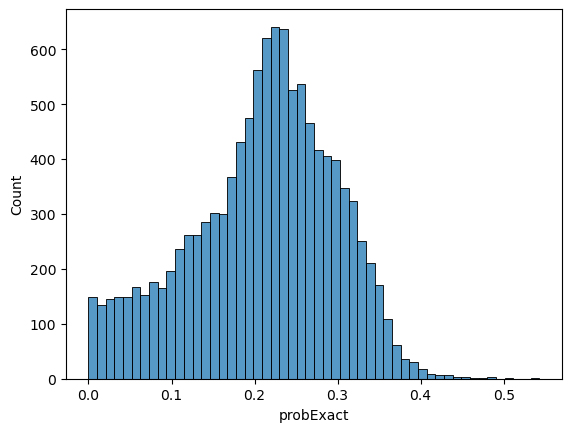

In [1215]:
sns.histplot(lgDF.probExact)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


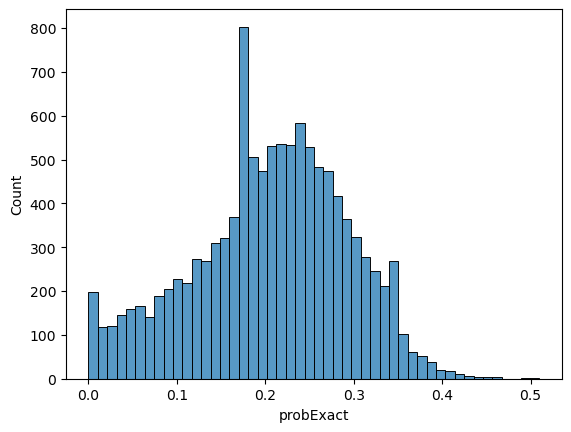

In [1216]:
sns.histplot(tpDF.probExact)
plt.show()

In [1217]:
nonDF = probDf(nonDProbs,y_test,data[['name','game_date']],testInd)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


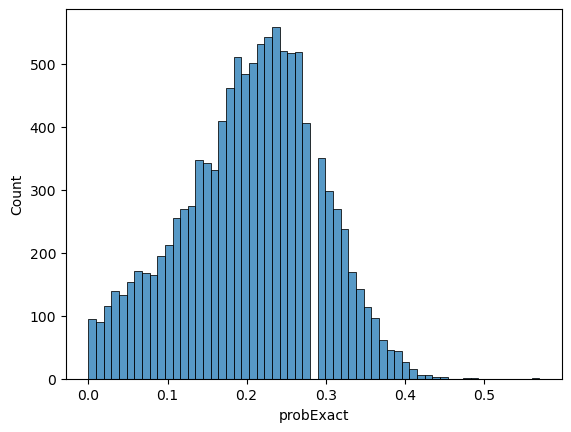

In [1218]:
sns.histplot(nonDF.probExact)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='probOccur+', ylabel='Count'>

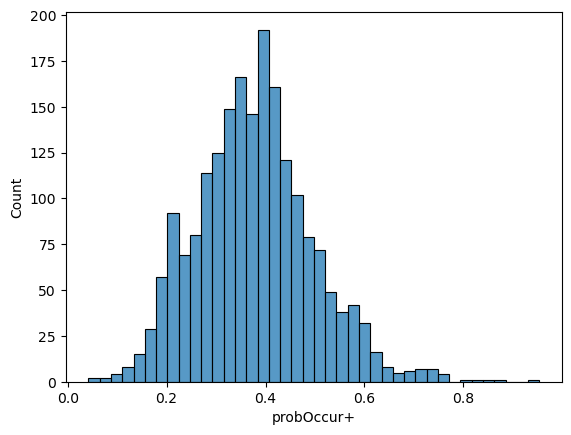

In [1223]:
sns.histplot(lgDF[np.where(lgDF.actuals==lgDF.careerAvgThrees.add(1.5).astype(int),True,False)]['probOccur+'])

In [1237]:
nonDF[nonDF.actuals - nonDF.careerAvgThrees>=.75].sort_values(by='probOccur+',ascending=False).head(50)

0     1     2     3     4     5     6     7     8     9    10    11  \
7601  0.170 0.350 0.240 0.170 0.050 0.000 0.000 0.020 0.000 0.000 0.000 0.000   
7658  0.230 0.570 0.100 0.080 0.020 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
7741  0.240 0.340 0.220 0.090 0.060 0.020 0.010 0.020 0.000 0.000 0.000 0.000   
5562  0.270 0.400 0.150 0.120 0.040 0.010 0.000 0.010 0.000 0.000 0.000 0.000   
6154  0.310 0.260 0.240 0.140 0.010 0.040 0.000 0.000 0.000 0.000 0.000 0.000   
3354  0.310 0.480 0.110 0.100 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
5939  0.320 0.360 0.130 0.120 0.050 0.020 0.000 0.000 0.000 0.000 0.000 0.000   
5861  0.330 0.380 0.170 0.100 0.020 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
6248  0.380 0.330 0.100 0.160 0.010 0.010 0.010 0.000 0.000 0.000 0.000 0.000   
7266  0.380 0.350 0.150 0.080 0.020 0.020 0.000 0.000 0.000 0.000 0.000 0.000   
5567  0.400 0.270 0.200 0.100 0.020 0.000 0.000 0.010 0.000 0.000 0.000 0.000   
3104  0.160 0.240 0.230 0.250 0.070 0.050 0.000 0.000 0.000 0.000 0.000 0.000   
2727  0.090 0.100 0.210 0.310 0.190 0.050 0.030 0.020 0.000 0.000 0.000 0.000   
5568  0.410 0.230 0.160 0.120 0.050 0.020 0.000 0.010 0.000 0.000 0.000 0.000   
1283  0.110 0.130 0.170 0.260 0.200 0.050 0.050 0.020 0.010 0.000 0.000 0.000   
2934  0.190 0.220 0.260 0.120 0.120 0.030 0.060 0.000 0.000 0.000 0.000 0.000   
3107  0.180 0.240 0.290 0.150 0.060 0.040 0.030 0.000 0.000 0.010 0.000 0.000   
230   0.060 0.160 0.210 0.200 0.190 0.060 0.100 0.020 0.000 0.000 0.000 0.000   
10647 0.080 0.200 0.160 0.240 0.160 0.090 0.050 0.020 0.000 0.000 0.000 0.000   
10659 0.060 0.220 0.160 0.250 0.200 0.050 0.060 0.000 0.000 0.000 0.000 0.000   
6210  0.210 0.230 0.320 0.140 0.060 0.010 0.020 0.010 0.000 0.000 0.000 0.000   
3237  0.090 0.170 0.180 0.320 0.100 0.110 0.020 0.010 0.000 0.000 0.000 0.000   
7389  0.200 0.250 0.240 0.190 0.060 0.030 0.020 0.010 0.000 0.000 0.000 0.000   
6159  0.220 0.230 0.230 0.180 0.060 0.020 0.050 0.000 0.000 0.010 0.000 0.000   
1257  0.080 0.150 0.220 0.260 0.160 0.070 0.050 0.010 0.000 0.000 0.000 0.000   
7568  0.240 0.210 0.320 0.120 0.080 0.030 0.000 0.000 0.000 0.000 0.000 0.000   
10650 0.050 0.200 0.200 0.260 0.180 0.060 0.030 0.020 0.000 0.000 0.000 0.000   
3606  0.150 0.170 0.130 0.190 0.120 0.040 0.060 0.030 0.000 0.110 0.000 0.000   
1241  0.040 0.270 0.150 0.210 0.190 0.070 0.050 0.000 0.020 0.000 0.000 0.000   
4598  0.040 0.200 0.220 0.200 0.180 0.080 0.050 0.010 0.010 0.010 0.000 0.000   
4987  0.110 0.160 0.190 0.270 0.130 0.090 0.020 0.010 0.020 0.000 0.000 0.000   
8233  0.220 0.240 0.260 0.160 0.090 0.030 0.000 0.000 0.000 0.000 0.000 0.000   
9604  0.180 0.280 0.230 0.170 0.060 0.060 0.020 0.000 0.000 0.000 0.000 0.000   
10666 0.070 0.180 0.210 0.230 0.180 0.060 0.050 0.010 0.000 0.000 0.000 0.010   
1395  0.120 0.180 0.170 0.220 0.170 0.090 0.040 0.010 0.000 0.000 0.000 0.000   
2916  0.250 0.220 0.240 0.170 0.090 0.020 0.010 0.000 0.000 0.000 0.000 0.000   
1256  0.100 0.180 0.190 0.190 0.180 0.060 0.060 0.020 0.010 0.010 0.000 0.000   
11184 0.070 0.180 0.220 0.200 0.170 0.120 0.020 0.020 0.000 0.000 0.000 0.000   
9764  0.060 0.050 0.110 0.110 0.140 0.080 0.130 0.100 0.070 0.040 0.020 0.090   
4144  0.180 0.290 0.230 0.190 0.090 0.000 0.020 0.000 0.000 0.000 0.000 0.000   
3105  0.180 0.290 0.210 0.120 0.090 0.080 0.030 0.000 0.000 0.000 0.000 0.000   
7357  0.270 0.210 0.230 0.150 0.080 0.030 0.020 0.010 0.000 0.000 0.000 0.000   
5032  0.310 0.170 0.250 0.140 0.070 0.040 0.020 0.000 0.000 0.000 0.000 0.000   
9796  0.010 0.040 0.080 0.170 0.180 0.190 0.170 0.080 0.030 0.030 0.020 0.000   
5269  0.300 0.180 0.170 0.260 0.050 0.030 0.010 0.000 0.000 0.000 0.000 0.000   
2936  0.240 0.240 0.230 0.170 0.070 0.020 0.030 0.000 0.000 0.000 0.000 0.000   
7583  0.180 0.300 0.250 0.190 0.070 0.010 0.000 0.000 0.000 0.000 0.000 0.000   
6378  0.090 0.210 0.180 0.260 0.120 0.100 0.030 0.000 0.010 0.000 0.000 0.000   
4193  0.170 0.310 0.310 0.110 0.070 0.020

In [1233]:
lgDF[lgDF.actuals - lgDF.careerAvgThrees>=1.9].sort_values(by='probOccur+',ascending=False).head(50)

0     1     2     3     4     5     6     7     8     9    10    11  \
664   0.057 0.060 0.061 0.044 0.047 0.025 0.018 0.018 0.005 0.016 0.014 0.032   
2761  0.060 0.073 0.107 0.142 0.137 0.104 0.076 0.100 0.063 0.032 0.081 0.018   
4676  0.038 0.054 0.075 0.098 0.119 0.159 0.105 0.071 0.099 0.059 0.018 0.090   
3616  0.018 0.040 0.074 0.115 0.183 0.167 0.126 0.124 0.061 0.035 0.036 0.019   
4700  0.037 0.059 0.083 0.119 0.157 0.114 0.078 0.034 0.090 0.054 0.100 0.012   
5989  0.117 0.128 0.109 0.102 0.098 0.060 0.097 0.052 0.068 0.082 0.015 0.042   
10415 0.024 0.050 0.082 0.111 0.100 0.101 0.148 0.100 0.077 0.129 0.039 0.037   
11267 0.077 0.088 0.091 0.093 0.080 0.071 0.071 0.056 0.036 0.051 0.069 0.022   
5988  0.144 0.133 0.123 0.117 0.106 0.082 0.097 0.070 0.067 0.026 0.010 0.015   
634   0.044 0.075 0.115 0.155 0.140 0.120 0.140 0.058 0.074 0.037 0.012 0.025   
2762  0.060 0.081 0.111 0.177 0.128 0.101 0.078 0.080 0.048 0.051 0.039 0.040   
9181  0.050 0.073 0.106 0.081 0.122 0.140 0.132 0.107 0.131 0.029 0.026 0.001   
10431 0.054 0.102 0.159 0.115 0.143 0.124 0.124 0.075 0.078 0.011 0.013 0.001   
6820  0.060 0.132 0.179 0.216 0.213 0.099 0.065 0.023 0.008 0.003 0.000 0.001   
2075  0.046 0.091 0.126 0.156 0.171 0.120 0.099 0.071 0.048 0.034 0.018 0.016   
10374 0.064 0.108 0.137 0.140 0.140 0.127 0.118 0.062 0.049 0.024 0.008 0.016   
4671  0.023 0.060 0.116 0.201 0.194 0.176 0.100 0.094 0.025 0.005 0.006 0.000   
626   0.048 0.095 0.139 0.178 0.137 0.123 0.103 0.055 0.068 0.015 0.038 0.001   
1270  0.064 0.150 0.185 0.202 0.205 0.082 0.064 0.031 0.015 0.003 0.001 0.000   
10570 0.060 0.094 0.140 0.157 0.156 0.136 0.124 0.056 0.041 0.021 0.010 0.005   
3626  0.023 0.071 0.127 0.208 0.178 0.144 0.139 0.043 0.050 0.011 0.001 0.005   
9562  0.233 0.379 0.165 0.110 0.019 0.044 0.030 0.008 0.009 0.000 0.002 0.000   
9802  0.011 0.038 0.085 0.159 0.177 0.152 0.168 0.105 0.042 0.049 0.009 0.005   
2752  0.124 0.145 0.166 0.191 0.117 0.092 0.035 0.032 0.015 0.018 0.016 0.045   
6122  0.074 0.138 0.198 0.230 0.187 0.084 0.061 0.020 0.006 0.001 0.001 0.000   
1853  0.031 0.086 0.149 0.196 0.183 0.128 0.123 0.066 0.027 0.009 0.001 0.000   
6605  0.074 0.117 0.138 0.167 0.151 0.118 0.075 0.033 0.020 0.016 0.008 0.012   
985   0.022 0.057 0.116 0.160 0.155 0.141 0.182 0.065 0.055 0.019 0.011 0.016   
6362  0.112 0.121 0.127 0.135 0.156 0.102 0.097 0.043 0.020 0.017 0.016 0.026   
1282  0.082 0.146 0.212 0.213 0.142 0.093 0.071 0.028 0.009 0.001 0.001 0.000   
683   0.079 0.163 0.229 0.183 0.135 0.100 0.047 0.028 0.013 0.006 0.003 0.014   
4820  0.118 0.184 0.193 0.161 0.131 0.070 0.074 0.031 0.018 0.006 0.006 0.002   
1268  0.076 0.175 0.223 0.184 0.176 0.080 0.065 0.014 0.006 0.000 0.001 0.000   
2080  0.037 0.067 0.105 0.157 0.161 0.131 0.100 0.059 0.090 0.035 0.021 0.029   
6817  0.058 0.150 0.212 0.238 0.191 0.071 0.062 0.012 0.003 0.002 0.000 0.000   
4678  0.074 0.115 0.146 0.174 0.151 0.133 0.085 0.048 0.030 0.032 0.008 0.004   
3813  0.119 0.176 0.194 0.173 0.124 0.098 0.056 0.030 0.010 0.007 0.006 0.005   
5707  0.396 0.267 0.156 0.111 0.044 0.017 0.006 0.004 0.001 0.000 0.000 0.000   
6642  0.049 0.110 0.148 0.193 0.165 0.124 0.099 0.047 0.044 0.012 0.006 0.002   
1170  0.146 0.168 0.187 0.164 0.152 0.077 0.054 0.037 0.007 0.005 0.002 0.000   
4712  0.069 0.096 0.130 0.187 0.183 0.125 0.112 0.055 0.020 0.012 0.009 0.002   
1284  0.081 0.136 0.193 0.256 0.153 0.090 0.067 0.012 0.011 0.001 0.001 0.000   
9173  0.061 0.103 0.139 0.205 0.160 0.137 0.105 0.046 0.030 0.005 0.008 0.000   
1237  0.103 0.171 0.199 0.196 0.164 0.068 0.053 0.020 0.016 0.009 0.001 0.001   
9159  0.031 0.076 0.133 0.213 0.219 0.139 0.119 0.048 0.015 0.007 0.000 0.000   
6119  0.101 0.163 0.212 0.199 0.150 0.094 0.049 0.024 0.006 0.001 0.000 0.001   
9765  0.005 0.026 0.072 0.187 0.180 0.206 0.205 0.042 0.030 0.036 0.003 0.008   
4129  0.159 0.190 0.183 0.146 0.112 0.090 0.049 0.028 0.015 0.010 0.003 0.009   
4696  0.050 0.100 0.154 0.188 0.190 0.123

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='probExact', ylabel='Count'>

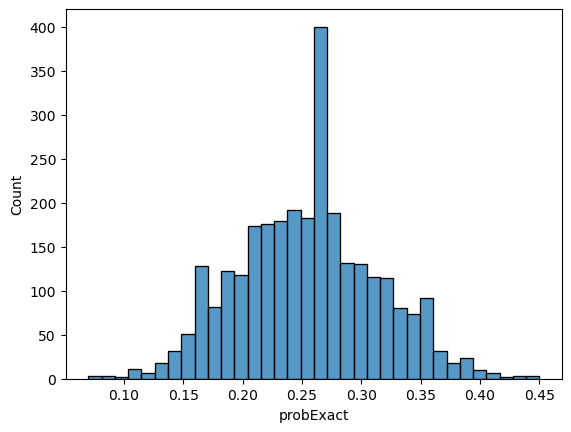

In [1221]:
sns.histplot(nonDF[np.where(nonDF.actuals==nonDF.careerAvgThrees.add(.5).astype(int),True,False)].probExact)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='probExact', ylabel='Count'>

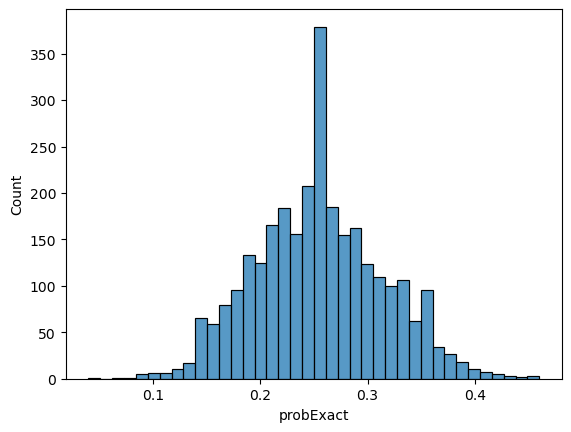

In [1222]:
sns.histplot(tpDF[np.where(tpDF.actuals==tpDF.careerAvgThrees.add(.5).astype(int),True,False)].probExact)

In [1353]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             threesMade   R-squared (uncentered):                   0.020
Model:                            OLS   Adj. R-squared (uncentered):              0.020
Method:                 Least Squares   F-statistic:                              1533.
Date:                Sun, 13 Oct 2024   Prob (F-statistic):                        0.00
Time:                        20:24:09   Log-Likelihood:                     -1.7173e+05
No. Observations:               73668   AIC:                                  3.435e+05
Df Residuals:                   73667   BIC:                                  3.435e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
abv_fgallowedkurt     0.2281      0.006     39.150      0.000       0.217       0.240
==============================================================================
Omnibus:                    10512.122   Durbin-Watson:                   0.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17319.135
Skew:                           0.973   Prob(JB):                         0.00
Kurtosis:                       4.363   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1382]:
##Capped shots made at 8
rfCap = RandomForestClassifier()

In [1416]:
rfCap.fit(x__train_scale,[8 if x>= 8 else x for x in y_train])
capProbs = rfCap.predict_proba(X_test)

In [1479]:
capDF = probDf(capProbs,pd.Series([8 if x>=8 else x for x in y_test]),data[['name','game_date','careerAvgThrees']],testInd)

In [1759]:
def probDf(probs,y,addDf,ind):
    df = pd.DataFrame(probs,index = ind)
    df['probOccur+'] =  [sum(probs[act:]) if act != 0 else probs[0] for probs,act in zip(probs,y.values)]
    df['probExact'] = [probs[act] for probs,act in zip(df.values,y.values)]
    df['actuals'] = y.values
    df = df.join(addDf.loc[ind][['name','game_date']]).reset_index(drop=True)
    return df

In [ ]:
capDF.drop

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='probOccur+', ylabel='Count'>

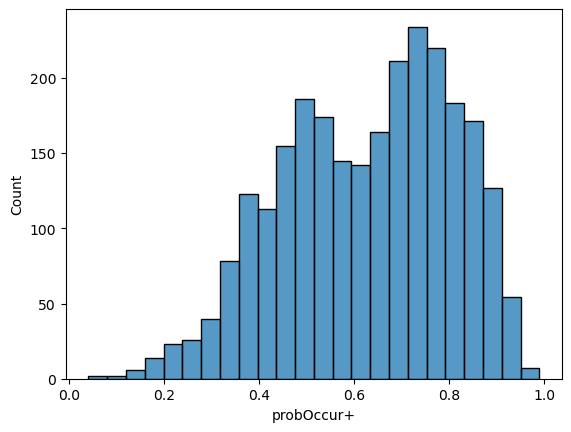

In [1487]:
pltdf = capDF.dropna()
sns.histplot(pltdf[np.where(pltdf.actuals==pltdf.careerAvgThrees.add(.5).astype(int),True,False)]['probOccur+'])

In [1488]:
pltdf[np.where(pltdf.actuals==pltdf.careerAvgThrees.add(.5).astype(int),True,False)]['probOccur+'].value_counts()

probOccur+
0.550    50
0.510    47
0.500    44
0.520    43
0.770    43
         ..
0.960     1
0.150     1
0.380     1
0.850     1
0.860     1
Name: count, Length: 234, dtype: int64

In [1507]:
pltdf.columns

Index([          'index',                 0,                 1,
                       2,                 3,                 4,
                       5,                 6,                 7,
                       8,      'probOccur+',       'probExact',
               'actuals',            'name',       'game_date',
       'careerAvgThrees'],
      dtype='object')

In [1532]:
nonDF[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,]].mean()

0    0.192
1    0.254
2    0.226
3    0.156
4    0.091
5    0.043
6    0.023
7    0.009
8    0.004
9    0.001
10   0.001
11   0.000
12   0.000
13   0.000
dtype: float64

In [1533]:
lgDF[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,]].mean()

0    0.204
1    0.262
2    0.218
3    0.152
4    0.085
5    0.040
6    0.022
7    0.009
8    0.004
9    0.002
10   0.001
11   0.001
12   0.001
13   0.000
dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

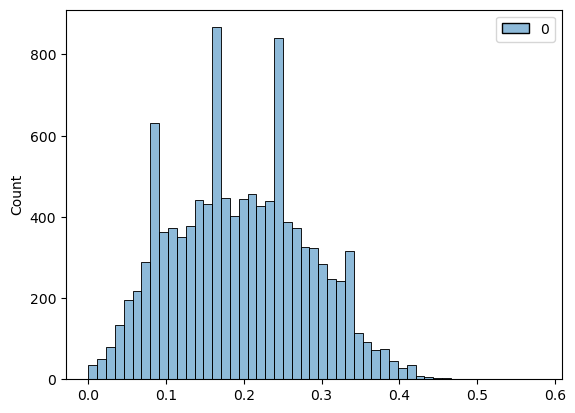

In [1516]:
sns.histplot(pltdf[[0]])

In [1531]:
plSht = pd.read_sql('''select abv_fga,abv_fgm,lc_fga,lc_fgm,rc_fga,rc_fgm,player_id,name,game_date,usagePercentage

                    from plyrLogs
                    JOIN 
                        (SELECT RANK() OVER(PARTITION BY team_id,season ORDER BY game_date)

                    '''

threesMade               name player_id     game_id   game_date  \
0               0         Chris Paul    101108  0021700002  2017-10-17   
1               1       Terry Rozier   1626179  0021700001  2017-10-17   
2               2       Jaylen Brown   1627759  0021700001  2017-10-17   
3               1       Jayson Tatum   1628369  0021700001  2017-10-17   
4               4        P.J. Tucker    200782  0021700002  2017-10-17   
...           ...                ...       ...         ...         ...   
75688           2     Andrew Wiggins    203952  0022301198  2024-04-14   
75689           1        Dario Saric    203967  0022301198  2024-04-14   
75690           3  Bogdan Bogdanovic    203992  0022301188  2024-04-14   
75691           1     Vasilije Micic    203995  0022301187  2024-04-14   
75692           0       LeBron James      2544  0022301195  2024-04-14   

        season team  height  exp    age  ...  crn_fgallowedskew  \
0      2017-18  HOU      72   12 32.444  ...              0.760   
1      2017-18  BOS      73    2 23.581  ...             -0.082   
2      2017-18  BOS      78    1 20.975  ...             -0.082   
3      2017-18  BOS      80    0 19.619  ...             -0.082   
4      2017-18  HOU      77   11 32.446  ...              0.760   
...        ...  ...     ...  ...    ...  ...                ...   
75688  2023-24  GSW      79    9 28.641  ...              0.321   
75689  2023-24  GSW      82    9 29.520  ...              0.321   
75690  2023-24  ATL      77    9 31.157  ...              0.580   
75691  2023-24  CHA      75    9 29.752  ...              0.515   
75692  2023-24  LAL      81   20 38.790  ...              0.613   

       crn_fgallowedkurt  abv_fgallowedst  abv_fgallowednd  abv_fgallowedrd  \
0                  0.403           16.500           18.500           20.000   
1                 -1.448           18.000           20.000           23.000   
2                 -1.448           18.000           20.000           23.000   
3                 -1.448           18.000           20.000           23.000   
4                  0.403           16.500           18.500           20.000   
...                  ...              ...              ...              ...   
75688             -0.877           25.500           27.000           28.000   
75689             -0.877           25.500           27.000           28.000   
75690             -1.023           16.500           18.000           20.000   
75691             -0.681           23.000           23.500           25.000   
75692              0.618           27.000           28.000           29.000   

       abv_fgallowedrth  abv_fgallowedfth  abv_fgallowedxth  \
0                22.000            24.500            30.000   
1                23.500            28.000            34.000   
2                23.500            28.000            34.000   
3                23.500            28.000            34.000   
4                22.000            24.500            30.000   
...                 ...               ...               ...   
75688            30.000            33.000            42.000   
75689            30.000            33.000            42.000   
75690            21.500            22.500            34.000   
75691            26.500            29.000            35.000   
75692            30.000            31.500            34.000   

       abv_fgallowedskew  abv_fgallowedkurt  
0                  0.548              0.048  
1                  0.377              0.048  
2                  0.377              0.048  
3                  0.377              0.048  
4                  0.548              0.048  
...                  ...                ...  
75688              1.161              1.807  
75689              1.161              1.807  
75690              1.527              3.132  
75691              0.778              0.884  
75692              0.002              0.077  

[75693 rows x 131 columns]

In [1540]:
rlCh = pd.read_sql(''' SELECT name, player_id, season, (coalesce(lc_fga,0) + coalesce(rc_fga,0)) crn_fga, abv_fga, game_date
                from pgames
                WHERE player_id||season in 
                    (SELECT player_id||season
                    FROM pgames 

                    group by player_id,season

                    HAVING AVG(coalesce(lc_fga,0) + coalesce(rc_fga,0) + coalesce(abv_fga,0)) >= 3
                    and max(plyrGameCt) >= 16
                    
                    )
                ''',nba.conn)

In [1601]:
shtQuantQ = '''SELECT game_date,
  MAX(CASE WHEN abv_tile = 1 THEN abv_fga END) AS abv_tile1,
  MAX(CASE WHEN abv_tile = 2 THEN abv_fga END) AS abv_tile2,
  MAX(CASE WHEN abv_tile = 3 THEN abv_fga END) AS abv_tile3,
  MAX(CASE WHEN abv_tile = 4 THEN abv_fga END) AS abv_tile4,
  MAX(CASE WHEN abv_tile = 5 THEN abv_fga END) AS abv_tile5,
  MAX(CASE WHEN abv_tile = 6 THEN abv_fga END) AS abv_tile6,
  MAX(CASE WHEN crn_tile = 1 THEN crn_fga END) AS crn_tile1,
  MAX(CASE WHEN crn_tile = 2 THEN crn_fga END) AS crn_tile2,
  MAX(CASE WHEN crn_tile = 3 THEN crn_fga END) AS crn_tile3,
  MAX(CASE WHEN crn_tile = 4 THEN crn_fga END) AS crn_tile4,
  MAX(CASE WHEN crn_tile = 5 THEN crn_fga END) AS crn_tile5,
  MAX(CASE WHEN crn_tile = 6 THEN crn_fga END) AS crn_tile6
FROM (
  SELECT game_date,abv_fga, NTILE(6) OVER (ORDER BY game_date) AS abv_tile,
         (coalesce(lc_fga,0) + coalesce(rc_fga,0)) crn_fga, NTILE(6) OVER (ORDER BY game_date) AS crn_tile
  FROM plyrLogs
  WHERE player_id||game_date in 
                    (SELECT player_id||game_date
                    FROM pgames 

                    group by player_id,season

                    HAVING AVG(coalesce(lc_fga,0) + coalesce(rc_fga,0) + coalesce(abv_fga,0)) >= 3
                    and max(plyrGameCt) >= 16
                    
                    )
) AS q
GROUP BY game_date,abv_tile,crn_tile;
'''

In [1599]:
tileq = '''  SELECT game_date,abv_fga, NTILE(6) OVER (ORDER BY game_date) AS abv_tile,
         (coalesce(lc_fga,0) + coalesce(rc_fga,0)) crn_fga, NTILE(6) OVER (ORDER BY game_date) AS crn_tile
  FROM plyrLogs
  WHERE player_id||game_date in 
                    (SELECT player_id||game_date
                    FROM pgames 

                    group by player_id,season

                    HAVING AVG(coalesce(lc_fga,0) + coalesce(rc_fga,0) + coalesce(abv_fga,0)) >= 3
                    and max(plyrGameCt) >= 16
                    
                    )'''
tiledf = pd.read_sql(tileq,nba.conn)

In [1612]:
pd.read_sql('''select distinct game_date from pgames
  WHERE player_id||season in 
                    (SELECT player_id||season
                    FROM pgames 

                    group by player_id,season

                    HAVING AVG(coalesce(lc_fga,0) + coalesce(rc_fga,0) + coalesce(abv_fga,0)) >= 3
                    and max(plyrGameCt) >= 16
                    
                    )
                    order by game_date''',nba.conn)

game_date
0     2016-10-25
1     2016-10-26
2     2016-10-27
3     2016-10-28
4     2016-10-29
...          ...
1272  2024-04-09
1273  2024-04-10
1274  2024-04-11
1275  2024-04-12
1276  2024-04-14

[1277 rows x 1 columns]

In [1613]:
pd.read_sql(shtQuantQ,nba.conn)

game_date  abv_tile1  abv_tile2  abv_tile3  abv_tile4  abv_tile5  \
0    2017-01-18      3.000        NaN        NaN        NaN        NaN   
1    2017-01-27      6.000        NaN        NaN        NaN        NaN   
2    2017-02-03      2.000        NaN        NaN        NaN        NaN   
3    2017-02-08      1.000        NaN        NaN        NaN        NaN   
4    2017-03-03      2.000        NaN        NaN        NaN        NaN   
..          ...        ...        ...        ...        ...        ...   
239  2024-04-09        NaN        NaN        NaN        NaN        NaN   
240  2024-04-10        NaN        NaN        NaN        NaN        NaN   
241  2024-04-11        NaN        NaN        NaN        NaN        NaN   
242  2024-04-12        NaN        NaN        NaN        NaN        NaN   
243  2024-04-14        NaN        NaN        NaN        NaN        NaN   

     abv_tile6  crn_tile1  crn_tile2  crn_tile3  crn_tile4  crn_tile5  \
0          NaN      1.000        NaN        NaN        NaN        NaN   
1          NaN      0.000        NaN        NaN        NaN        NaN   
2          NaN      0.000        NaN        NaN        NaN        NaN   
3          NaN      0.000        NaN        NaN        NaN        NaN   
4          NaN      0.000        NaN        NaN        NaN        NaN   
..         ...        ...        ...        ...        ...        ...   
239     13.000        NaN        NaN        NaN        NaN        NaN   
240     13.000        NaN        NaN        NaN        NaN        NaN   
241     10.000        NaN        NaN        NaN        NaN        NaN   
242     13.000        NaN        NaN        NaN        NaN        NaN   
243     14.000        NaN        NaN        NaN        NaN        NaN   

     crn_tile6  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
..         ...  
239      0.000  
240      2.000  
241      3.000  
242      3.000  
243      6.000  

[244 rows x 13 columns]

In [1571]:
#need to get the frame into game dates
quants = ([1/6,1/3,.5,2/3,5/6,1],['st','nd','rd','rth','fth','xth'])
for loc in ['crn_fga','abv_fga']:
    temp = [rlCh.groupby(['player_id'])[loc].rolling(41,closed='left',min_periods=10).quantile(q,'midpoint')for q in quants[0]]
    pdf = pd.DataFrame(temp,index=['{}{}'.format(loc,q) for q in quants[1]]).T

In [1572]:
teamPdf = pd.DataFrame(teamTemp,index=['abv_fga{}'.format(q) for q in quants[1]]).T

In [1573]:
teamPdf

abv_fgast  abv_fgand  abv_fgard  abv_fgarth  abv_fgafth  \
game_date                                                                   
2016-10-25 721          NaN        NaN        NaN         NaN         NaN   
           44253        NaN        NaN        NaN         NaN         NaN   
           45814        NaN        NaN        NaN         NaN         NaN   
           48644        NaN        NaN        NaN         NaN         NaN   
           50825        NaN        NaN        NaN         NaN         NaN   
...                     ...        ...        ...         ...         ...   
2024-04-14 79758      2.000      2.000      4.000       4.000       6.000   
           80525      2.000      2.000      4.000       4.000       6.000   
           80962      2.000      2.000      4.000       4.000       6.000   
           80990      2.000      2.000      4.000       4.000       5.000   
           83097      2.000      2.000      4.000       4.000       5.000   

                  abv_fgaxth  
game_date                     
2016-10-25 721           NaN  
           44253         NaN  
           45814         NaN  
           48644         NaN  
           50825         NaN  
...                      ...  
2024-04-14 79758      10.000  
           80525      10.000  
           80962      10.000  
           80990      10.000  
           83097      10.000  

[84206 rows x 6 columns]

In [1582]:
#need to get the frame by date

temp,index=['{}{}'.format(loc,q) for q in quants[1]]).T

game_date
2016-10-25    8.000
2016-10-26   10.000
2016-10-27    7.000
2016-10-28    9.000
2016-10-29   10.000
              ...  
2024-04-09   16.000
2024-04-10   13.000
2024-04-11   14.000
2024-04-12   13.000
2024-04-14   14.000
Name: abv_fga, Length: 1277, dtype: float64

In [ ]:
nonDistCols

In [1670]:
x_train_scale = X.loc[trainInd].filter(nonDistCols)
scaleCols = ['mvAvgThrees', 'mvAvgUsage', 'mvAvgOffRating', 'mvAvgFtPrct',
       'mvAvgThrPtPrct', 'seasonUsage', 'seasonOffRating', 'seasonFtPrct',
       'seasonThrPtPrct', 'mvAvgOppPace', 'mvAvgOppOpen3',
       'mvAvgOppWide3', 'mvAvgOppDefRating', 'seasonOppPace', 'seasonOppOpen3',
       'seasonOppWide3', 'seasonOppDefRating','height','exp','age','daysBetweenGames', 'gamesInFive',
       'gamesInThree', 'oppGamesFive', 'oppGamesThree', 'oppDaysLastGame']
for col in scaleCols:
    x_train_scale[col] = ss.fit_transform(x_train_scale[col].values.reshape(-1,1))
mm = sm.MNLogit(endog = y_train, exog = x_train_scale,method='bfgs')
model = mm.fit()
x_test_scale = X_test.filter(nonDistCols).copy()
for col in scaleCols:
    x_test_scale[col] = ss.fit_transform(x_test_scale[col].values.reshape(-1,1))
preds = model.predict(x_test_scale)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['method']
  warnings.warn(msg, ValueWarning)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3025: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3026: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


Optimization terminated successfully.
         Current function value: nan
         Iterations 16


In [180]:
data = nba.threeData()
y = data.threesMade


DatabaseError: Execution failed on sql '
-- This primiarily calculates rolling fields and game information for the days game to be used in the model.
-- Need to check game info in the future to see if we can preload a schedule
-- Shot attempts will be done in seperate queries as they are going through a python function for the rolling information
-- Future updates - how to incorporate inactives, can do a rolling value but would like more information on who is out and impact

SELECT 
--y
threesMade,

--identifiers
name, player_id, game_id, game_date, season, team,

--demo data
height, exp, age,

--shot locations, will have percentiles done in pandas
ra_fga, paint_fga, mid_fga, (coalesce(lc_fga,0) + coalesce(rc_fga,0)) crn_fga, abv_fga,

--games info
daysBetweenGames, gamesInFive, gamesInThree, oppGamesFive, OppGamesThree, oppDaysLastGame, home, plyrGameCt, tmGameCt,
CASE WHEN plyrGameCt<= 10 THEN 1 ELSE 0 END 

--roling offensive (5 games and season) metrics 

AVG(threesMade) OVER (PARTITION BY season,player_id
    ORDER BY plyrGameCt ROWS BETWEEN 6 PRECEDING AND 1 PRECEDING) AS mvAvgThrees,
AVG(usagePercentage) OVER (PARTITION BY season,player_id
    ORDER BY plyrGameCt ROWS BETWEEN 6 PRECEDING AND 1 PRECEDING) AS mvAvgUsage,
AVG(offensiveRating) OVER (PARTITION BY season,player_id
    ORDER BY plyrGameCt ROWS BETWEEN 6 PRECEDING AND 1 PRECEDING) AS mvAvgOffRating,
    
SUM(ftm) OVER (PARTITION BY season,player_id
    ORDER BY plyrGameCt ROWS BETWEEN 6 PRECEDING AND 1 PRECEDING) * 1.0
/ SUM(fta) OVER (PARTITION BY season,player_id
    ORDER BY plyrGameCt ROWS BETWEEN 6 PRECEDING AND 1 PRECEDING) as mvAvgFtPrct,

SUM(lc_fgm+rc_fgm + abv_fgm) OVER (PARTITION BY season,player_id
    ORDER BY plyrGameCt ROWS BETWEEN 6 PRECEDING AND 1 PRECEDING) * 1.0
/    SUM(lc_fga + rc_fga + abv_fga) OVER (PARTITION BY season,player_id
    ORDER BY plyrGameCt ROWS BETWEEN 6 PRECEDING AND 1 PRECEDING) as mvAvgThrPtPrct,    

AVG(usagePercentage) OVER (PARTITION BY season,player_id
    ORDER BY game_date ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) AS seasonUsage,
AVG(offensiveRating) OVER (PARTITION BY season,player_id
    ORDER BY game_date ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) AS seasonOffRating,
    
SUM(ftm) OVER (PARTITION BY season,player_id
    ORDER BY plyrGameCt ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) * 1.0
/ SUM(fta) OVER (PARTITION BY season,player_id
    ORDER BY plyrGameCt ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) as seasonFtPrct,
SUM(lc_fgm+rc_fgm + abv_fgm) OVER (PARTITION BY season,player_id
    ORDER BY plyrGameCt ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) * 1.0
/    SUM(lc_fga + rc_fga + abv_fga) OVER (PARTITION BY season,player_id
    ORDER BY plyrGameCt ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) as seasonThrPtPrct,

--career metrics
SUM(ftm) OVER (PARTITION BY player_id
    ORDER BY plyrGameCt ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) * 1.0
/ SUM(fta) OVER (PARTITION BY player_id
    ORDER BY plyrGameCt ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING)  as careerFtPrct,
    
SUM(lc_fgm+rc_fgm + abv_fgm) OVER (PARTITION BY player_id
    ORDER BY plyrGameCt ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) * 1.0
/    SUM(lc_fga + rc_fga + abv_fga) OVER (PARTITION BY player_id
    ORDER BY plyrGameCt ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) as careerThrPtPrct, 

AVG(usagePercentage) OVER (PARTITION BY player_id
    ORDER BY game_date ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) AS careerUsage,
AVG(offensiveRating) OVER (PARTITION BY player_id
    ORDER BY game_date ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) AS careerOffRating,
AVG(threesMade) OVER (PARTITION BY player_id
    ORDER BY game_date ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING) AS careerAvgThrees,
    

-- defensive information
opp_id, 
--moving (5 games) and season averages
mvAvgOppPace, mvAvgOppOpen3, mvAvgOppWide3, mvAvgOppDefrating, 
seasonOppPace,  seasonOppOpen3,  seasonOppWide3,  seasonOppDefRating


FROM pgames
WHERE player_id||season in 
                    (SELECT player_id||season
                    FROM pgames 

                    group by player_id,season

                    HAVING AVG(coalesce(lc_fga,0) + coalesce(rc_fga,0) + coalesce(abv_fga,0)) >= 3
                    and max(plyrGameCt) >= 16
                    
                    )
order by game_date': near "(": syntax error

In [1817]:
model = pd.read_pickle('data/model/thrLogit.pkl')
X = data.filter(model.params.index)
X = nba.scaleData(X)
preds = model.predict(X)
df = probDf(preds.values,y.loc[valInd],data[['name','game_date']],valInd)
c = [12,11,10,9,8,7,6,5,4,3,2,1,0]
pd.DataFrame(np.array([nba.convertPercentToOdds(v) for r in day[c].cumsum(axis=1).values for v in r]).reshape(df[c].shape),columns=c)

In [1925]:
#need to read in bet history
bets = pd.read_csv('data/3bets.csv')

In [1939]:
thrBets = bets[bets.tags.str.strip() == '3play']

In [1942]:
thrBets

bet_id          sportsbook    type        status   odds  \
1861  O/0586450/0001060  Fanduel Sportsbook  parlay  SETTLED_LOSS 58.590   
1957  O/0586450/0001010  Fanduel Sportsbook  parlay  SETTLED_LOSS  4.680   
1958  O/0586450/0001008  Fanduel Sportsbook  parlay  SETTLED_LOSS  5.040   
1969  O/0586450/0001009  Fanduel Sportsbook  parlay   SETTLED_WIN  4.100   
2101  O/0586450/0000954  Fanduel Sportsbook  parlay  SETTLED_LOSS 80.080   
...                 ...                 ...     ...           ...    ...   
4124  O/0586450/0000117  Fanduel Sportsbook  parlay  SETTLED_LOSS  8.900   
4131  O/0586450/0000113  Fanduel Sportsbook  parlay  SETTLED_LOSS 25.400   
4140  O/0586450/0000109  Fanduel Sportsbook  parlay  SETTLED_LOSS 23.030   
4164  O/0586450/0000101  Fanduel Sportsbook  parlay  SETTLED_LOSS 31.350   
4178  O/0586450/0000094  Fanduel Sportsbook  parlay  SETTLED_LOSS  5.030   

      closing_line     ev  amount  profit              time_placed  \
1861        45.960  0.275   1.500  -1.500  04/28/2024 12:22:23 GMT   
1957         5.030 -0.070   2.000   0.000  04/22/2024 19:42:30 GMT   
1958         5.990 -0.159   2.000   0.000  04/22/2024 19:41:21 GMT   
1969         5.200 -0.211   2.000   6.200  04/22/2024 19:42:03 GMT   
2101        44.660  0.793   0.750  -0.750  04/14/2024 10:19:05 GMT   
...            ...    ...     ...     ...                      ...   
4124         8.450  0.053   0.250  -0.250  12/15/2023 19:22:17 GMT   
4131        27.460 -0.075   1.500  -1.500  12/15/2023 00:22:59 GMT   
4140           NaN    NaN   1.500  -1.500  12/14/2023 15:32:59 GMT   
4164           NaN    NaN   0.500  -0.500  12/13/2023 00:53:27 GMT   
4178           NaN    NaN   2.000  -2.000  12/11/2023 23:43:24 GMT   

                 time_settled  \
1861  04/28/2024 20:02:22 GMT   
1957  04/23/2024 04:46:03 GMT   
1958  04/23/2024 04:46:03 GMT   
1969  04/23/2024 00:28:06 GMT   
2101  04/14/2024 19:27:31 GMT   
...                       ...   
4124  12/16/2023 02:36:28 GMT   
4131  12/15/2023 04:32:23 GMT   
4140  12/15/2023 03:00:02 GMT   
4164  12/13/2023 03:37:28 GMT   
4178  12/12/2023 03:10:37 GMT   

                                               bet_info    tags      sports  \
1861  Josh Hart 3+ Made Threes New York Knicks @ Phi...  3play   Basketball   
1957  Evan Mobley 1+ Made Threes Orlando Magic @ Cle...  3play   Basketball   
1958  Josh Hart 2+ Made Threes Philadelphia 76ers @ ...  3play   Basketball   
1969  Evan Mobley 1+ Made Threes Orlando Magic @ Cle...  3play   Basketball   
2101  Nikola Jovic 3+ Made Threes Toronto Raptors @ ...  3play   Basketball   
...                                                 ...     ...         ...   
4124  Buddy Hield Over 3.5 Buddy Hield - Alt Threes ...  3play   Basketball   
4131  Michael Porter Jr. Over 3.5 Michael Porter Jr....  3play   Basketball   
4140  Jaylen Brown 4+ Made Threes Cleveland Cavalier...  3play   Basketball   
4164  Michael Porter Jr. 5+ Made Threes Denver Nugge...  3play   Basketball   
4178  Jamal Murray 3+ Made Threes Denver Nuggets @ A...  3play   Basketball   

     leagues  
1861     NBA  
1957     NBA  
1958     NBA  
1969     NBA  
2101     NBA  
...      ...  
4124     NBA  
4131     NBA  
4140     NBA  
4164     NBA  
4178     NBA  

[177 rows x 15 columns]

In [7]:
data = nba.threeData()

In [8]:
nba.showTables

type          name      tbl_name  rootpage  \
0  table       rosters       rosters         4   
1  table       players       players         2   
2  table         teams         teams         6   
3  table      plyrLogs      plyrLogs       123   
4   view     team_game     team_game         0   
5  table  shotsAllowed  shotsAllowed       582   
6   view      team_def      team_def         0   
7   view        pgames        pgames         0   
8  table       teamLog       teamLog         7   

                                                 sql  
0  CREATE TABLE rosters(\n    teamId TEXT,\n    s...  
1  CREATE TABLE players(\n        player_id TEXT,...  
2  CREATE TABLE teams(\n    team_id TEXT,\n    te...  
3  CREATE TABLE plyrLogs (player_id TEXT,\nteam_i...  
4  CREATE VIEW team_game as \nSELECT season, game...  
5  CREATE TABLE shotsAllowed (team_id TEXT,\ngame...  
6  CREATE VIEW team_def AS\nselect \nseason, subs...  
7  CREATE VIEW pgames AS\nSELECT \n--identifiying...  
8  CREATE TABLE teamLog(\n        game_id TEXT,\n...

In [9]:
pd.read_sql('select * from rosters',nba.conn)

teamId seasonYear playerId   startDate     endDate
0     1610612737    2023-24   201988  2023-11-25  2024-02-07
1     1610612737    2023-24   202083  2023-11-11  2024-04-09
2     1610612737    2023-24   203991  2023-10-25  2024-04-12
3     1610612737    2023-24   203992  2023-10-25  2024-04-14
4     1610612737    2023-24  1627749  2023-10-25  2024-04-14
...          ...        ...      ...         ...         ...
4420  1610612766    2017-18  1626203  2017-10-18  2018-03-31
4421  1610612766    2017-18  1627779  2017-10-25  2018-04-10
4422  1610612766    2017-18  1628370  2017-10-18  2018-04-10
4423  1610612766    2017-18  1628407  2017-10-18  2018-03-31
4424  1610612766    2017-18  1628493  2017-10-25  2018-03-22

[4425 rows x 5 columns]

In [14]:
nba.threeData()

threesMade               name player_id     game_id   game_date  \
0               2      Channing Frye    101112  0021600001  2016-10-25   
1               2      Manu Ginobili      1938  0021600003  2016-10-25   
2               1       Kevin Durant    201142  0021600003  2016-10-25   
3               2         Kevin Love    201567  0021600001  2016-10-25   
4               0       Courtney Lee    201584  0021600001  2016-10-25   
...           ...                ...       ...         ...         ...   
84201           2     Andrew Wiggins    203952  0022301198  2024-04-14   
84202           1        Dario Saric    203967  0022301198  2024-04-14   
84203           3  Bogdan Bogdanovic    203992  0022301188  2024-04-14   
84204           1     Vasilije Micic    203995  0022301187  2024-04-14   
84205           0       LeBron James      2544  0022301195  2024-04-14   

        season team  height  exp    age  ...  ra_fgallowedskew  \
0      2016-17  CLE      84   11 33.415  ...               NaN   
1      2016-17  SAS      78   17 39.217  ...               NaN   
2      2016-17  GSW      83    9 28.044  ...               NaN   
3      2016-17  CLE      80    8 28.104  ...               NaN   
4      2016-17  NYK      77    8 31.034  ...               NaN   
...        ...  ...     ...  ...    ...  ...               ...   
84201  2023-24  GSW      79    9 28.641  ...             0.227   
84202  2023-24  GSW      82    9 29.520  ...             0.227   
84203  2023-24  ATL      77    9 31.157  ...             0.044   
84204  2023-24  CHA      75    9 29.752  ...            -0.552   
84205  2023-24  LAL      81   20 38.790  ...             0.517   

       ra_fgallowedkurt  paint_fgallowedskew  paint_fgallowedkurt  \
0                   NaN                  NaN                  NaN   
1                   NaN                  NaN                  NaN   
2                   NaN                  NaN                  NaN   
3                   NaN                  NaN                  NaN   
4                   NaN                  NaN                  NaN   
...                 ...                  ...                  ...   
84201            -0.749               -0.416               -0.001   
84202            -0.749               -0.416               -0.001   
84203            -1.113                0.926                0.273   
84204             0.668                0.972                0.358   
84205             1.483                2.224                6.438   

       mid_fgallowedskew  mid_fgallowedkurt  crn_fgallowedskew  \
0                    NaN                NaN                NaN   
1                    NaN                NaN                NaN   
2                    NaN                NaN                NaN   
3                    NaN                NaN                NaN   
4                    NaN                NaN                NaN   
...                  ...                ...                ...   
84201              0.337              1.244              0.309   
84202              0.337              1.244              0.309   
84203              0.535              0.004              0.484   
84204             -0.643              0.785              0.342   
84205              0.347              0.250              0.713   

       crn_fgallowedkurt  abv_fgallowedskew  abv_fgallowedkurt  
0                    NaN                NaN                NaN  
1                    NaN                NaN                NaN  
2                    NaN                NaN                NaN  
3                    NaN                NaN                NaN  
4                    NaN                NaN                NaN  
...                  ...                ...                ...  
84201             -0.711              0.997              1.449  
84202             -0.711              0.997              1.449  
84203             -1.016              1.218              1.789  
84204             -0.921              0.664          

In [16]:
import nba_api

In [18]:
nba_api.stats.endpoints.

'nba_api'

In [73]:
import requests
r = requests.get("http://data.nba.com/data/10s/v2015/json/mobile_teams/nba/2024/league/00_full_schedule.json")
r.json()

{'lscd': [{'mscd': {'mon': 'January',
    'g': [{'gid': '0022400455',
      'gcode': '20250101/ORLDET',
      'seri': '',
      'is': 1,
      'gdte': '2025-01-01',
      'htm': '2025-01-01T19:00:00',
      'vtm': '2025-01-01T19:00:00',
      'etm': '2025-01-01T19:00:00',
      'an': 'Little Caesars Arena',
      'ac': 'Detroit',
      'as': 'MI',
      'st': '1',
      'stt': '7:00 pm ET',
      'bd': {'b': [{'seq': 1,
         'broadcasterId': 1188,
         'disp': '97.1 FM The Ticket',
         'scope': 'home',
         'type': 'radio',
         'lan': 'English',
         'url': None},
        {'seq': 2,
         'broadcasterId': 1000339,
         'disp': 'Bally Sports DET',
         'scope': 'home',
         'type': 'tv',
         'lan': 'English',
         'url': None},
        {'seq': 3,
         'broadcasterId': 1000353,
         'disp': 'Bally Sports Florida',
         'scope': 'away',
         'type': 'tv',
         'lan': 'English',
         'url': None},
        {'seq': 4,


game_date     game_id     team_id  home
0     2025-01-01  0022400455  1610612765     1
1     2025-01-01  0022400456  1610612764     1
2     2025-01-01  0022400457  1610612748     1
3     2025-01-01  0022400458  1610612752     1
4     2025-01-01  0022400459  1610612761     1
...          ...         ...         ...   ...
2395  2024-12-31  0022400450  1610612749     0
2396  2024-12-31  0022400451  1610612746     0
2397  2024-12-31  0022400452  1610612750     0
2398  2024-12-31  0022400453  1610612763     0
2399  2024-12-31  0022400454  1610612739     0

[2400 rows x 4 columns]

In [93]:
pi = nba_api.stats.endpoints.PlayerIndex().get_data_frames()[0]

In [102]:
f = pi[['TEAM_ID']]
f['seasonYear'] = '2024-25'
f['playerId'] = pi.PERSON_ID
f['startDate'] = '2024-10-22'
f['endDate'] = None

In [197]:
[(idx,x) for idx,x in enumerate(pd.read_sql('select * from teamLog limit 1',nba.conn).columns)]

[(0, 'game_id'),
 (1, 'game_date'),
 (2, 'team_id'),
 (3, 'inactive'),
 (4, 'count_inactive'),
 (5, 'assist_pct'),
 (6, 'off_rate'),
 (7, 'def_rate'),
 (8, 'pace'),
 (9, 'possessions'),
 (10, 'off_reb_pct'),
 (11, 'def_reb_pct'),
 (12, 'second_pts'),
 (13, 'fastb_pts'),
 (14, 'tm_to'),
 (15, 'to_pts'),
 (16, 'home'),
 (17, 'q1_pts'),
 (18, 'q2_pts'),
 (19, 'q3_pts'),
 (20, 'q4_pts'),
 (21, 'ot1_pts'),
 (22, 'ot2_pts'),
 (23, 'ot3_pts'),
 (24, 'ot4_pts'),
 (25, 'win'),
 (26, 'season')]

In [200]:
[(idx,x) for idx,x in enumerate(tmInfo.columns)]

[(0, 'game_id'),
 (1, 'game_date'),
 (2, 'team_id'),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 15),
 (16, 17),
 (17, 18),
 (18, 19),
 (19, 20),
 (20, 21),
 (21, 22),
 (22, 23),
 (23, 24),
 (24, 25),
 (25, 'season')]

In [107]:
pd.read_sql('select * from plyrLogs limit 1',nba.conn).columns

Index(['player_id', 'team_id', 'game_id', 'game_date', 'min', 'ftm', 'fta',
       'reb', 'ast', 'tov', 'stl', 'blk', 'blka', 'pf', 'pfd', 'pts',
       'plus_minus', 'dd2', 'td3', 'offensiveRating', 'defensiveRating',
       'usagePercentage', 'pace', 'possessions', 'team_first', 'game_first',
       'oreb', 'oreb_contest', 'oreb_chances', 'oreb_chance_defer',
       'avg_oreb_dist', 'dreb', 'dreb_contest', 'dreb_chances',
       'dreb_chance_defer', 'avg_dreb_dist', 'ra_fgm', 'ra_fga', 'paint_fga',
       'paint_fgm', 'mid_fgm', 'mid_fga', 'lc_fgm', 'lc_fga', 'rc_fgm',
       'rc_fga', 'abv_fgm', 'abv_fga', 'Starter'],
      dtype='object')

In [556]:
game_dates = ['2020-09-22',]
strD = ','.join(["'{}'".format(d) for d in game_dates])

In [ ]:
thrq = open(

In [577]:
thrD = nba.threeData()

In [583]:
thrD[thrD.game_date<='2024-10-22'].groupby(['player_id','name']).last(2)

threesMade  height  exp    age  \
player_id name                                                 
101108    Chris Paul                   0      72   18 38.442   
1626145   Tyus Jones                   3      73    8 27.431   
1626156   D'Angelo Russell             0      75    9 28.643   
1626157   Karl-Anthony Towns           0      84    9 28.917   
1626162   Kelly Oubre Jr.              1      79    8 27.849   
...                                  ...     ...  ...    ...   
203967    Dario Saric                  1      82    9 29.520   
203992    Bogdan Bogdanovic            3      77    9 31.157   
203995    Vasilije Micic               1      75    9 29.752   
204001    Kristaps Porzingis           0      86    9 29.205   
2544      LeBron James                 0      81   21 39.792   

                              daysBetweenGames  gamesInFive  gamesInThree  \
player_id name                                                              
101108    Chris Paul                     1.000            3             2   
1626145   Tyus Jones                     3.000            2             1   
1626156   D'Angelo Russell               9.000            1             1   
1626157   Karl-Anthony Towns             9.000            1             1   
1626162   Kelly Oubre Jr.                1.000            2             2   
...                                        ...          ...           ...   
203967    Dario Saric                    2.000            2             1   
203992    Bogdan Bogdanovic              1.000            3             2   
203995    Vasilije Micic                 1.000            3             2   
204001    Kristaps Porzingis             9.000            1             1   
2544      LeBron James                   9.000            1             1   

                              oppGamesFive  oppGamesThree  oppDaysLastGame  \
player_id name                                                               
101108    Chris Paul                     3              2            1.000   
1626145   Tyus Jones                     3              2            1.000   
1626156   D'Angelo Russell               1              1            9.000   
1626157   Karl-Anthony Towns             1              1            9.000   
1626162   Kelly Oubre Jr.                3              2            1.000   
...                                    ...            ...              ...   
203967    Dario Saric                    3              2            1.000   
203992    Bogdan Bogdanovic              2              2            1.000   
203995    Vasilije Micic                 3              2            1.000   
204001    Kristaps Porzingis             1              1            9.000   
2544      LeBron James                   1              1            9.000   

                              ...  ra_fgallowedskew  ra_fgallowedkurt  \
player_id name                ...                                       
101108    Chris Paul          ...             0.345            -0.741   
1626145   Tyus Jones          ...             0.398            -0.964   
1626156   D'Angelo Russell    ...             0.405             0.361   
1626157   Karl-Anthony Towns  ...             0.173            -0.696   
1626162   Kelly Oubre Jr.     ...             0.923             0.270   
...                           ...               ...               ...   
203967    Dario Saric         ...             0.345            -0.741   
203992    Bogdan Bogdanovic   ...             0.102            -1.206   
203995    Vasilije Micic      ...            -0.450             0.495   
204001    Kristaps Porzingis  ...             0.487            -0.869   
2544      LeBron James        ...             0.405             0.361   

                              paint_fgallowedskew  paint_fgallowedkurt  \
player_id name                                                           
101108    Chris Paul                       -0.545                0.083   
1626145 

In [588]:
thrD[(thrD.name=='LeBron James') & (thrD.game_date > '2024-04-10') & (thr.game_date <='2024-10-22')].iloc[:,20:40]

mvAvgThrees  mvAvgUsage  mvAvgOffRating  mvAvgFtPrct  mvAvgThrPtPrct  \
62765        2.000         NaN             NaN        0.735           0.522   
62899        2.500         NaN             NaN        0.707           0.556   
62925          NaN         NaN             NaN          NaN             NaN   

       seasonUsage  seasonOffRating  seasonFtPrct  seasonThrPtPrct  \
62765        0.286          117.265         0.748            0.412   
62899        0.286          117.265         0.747            0.412   
62925          NaN              NaN           NaN              NaN   

       careerFtPrct  careerThrPtPrct  careerUsage  careerOffRating  \
62765         0.713            0.360        0.307          113.876   
62899         0.712            0.360        0.307          113.876   
62925         0.757            0.286        0.307          113.906   

       careerAvgThrees      opp_id  mvAvgOppPace  mvAvgOppOpen3  \
62765            2.116  1610612763        97.833          0.326   
62899            2.117  1610612740        99.417          0.368   
62925            2.113  1610612750           NaN            NaN   

       mvAvgOppWide3  mvAvgOppDefRating  seasonOppPace  
62765          0.577            109.433         98.621  
62899          0.543            113.050         98.700  
62925            NaN                NaN            NaN

player_id     team_id     game_id   game_date    min  ftm  fta  reb  ast  \
0    203463  1610612763  0021701227  2018-04-11 31.717    4    4    4    3   
1    203994  1610612757  0021701229  2018-04-11 29.533    1    5    9    3   
2    202355  1610612748  0021701221  2018-04-11 22.383    0    0   12    2   
3    201950  1610612740  0021701226  2018-04-11 34.100    1    1    3    7   
4    203459  1610612751  0021701219  2018-04-11 25.833    1    1    7    3   
5   1628400  1610612738  0021701219  2018-04-11 28.467    0    0    6    0   
6    203500  1610612760  0021701227  2018-04-11 36.482    6    7    7    0   
7   1627936  1610612747  0021701228  2018-04-11 28.913    2    4    7    2   
8    203121  1610612740  0021701226  2018-04-11 20.583    3    3    4    1   
9   1628436  1610612752  0021701220  2018-04-11 28.483    1    1    3    2   

   tov  ...  paint_fgm  mid_fgm  mid_fga  lc_fgm  lc_fga  rc_fgm  rc_fga  \
0    1  ...          1        1        2   0.000   0.000       0       0   
1    3  ...          1        1        2   0.000   0.000       0       0   
2    0  ...          0        1        1   0.000   0.000       0       0   
3    6  ...          7        0        0   0.000   0.000       0       0   
4    0  ...          0        0        1   0.000   0.000       0       0   
5    0  ...          0        0        0   0.000   1.000       0       1   
6    2  ...          0        0        0   0.000   0.000       0       0   
7    2  ...          0        0        1   0.000   0.000       0       0   
8    0  ...          1        1        1     NaN     NaN       0       0   
9    3  ...          1        1        2   0.000   0.000       0       0   

   abv_fgm  abv_fga  Starter  
0        2        5     None  
1        0        0     None  
2        0        0     None  
3        0        2     None  
4        5       10     None  
5        1        2     None  
6        0        0     None  
7        3        4     None  
8        0        1     None  
9        4        7     None  

[10 rows x 49 columns]

In [598]:
tmScr = pd.read_sql('select game_date, team_id, player_id , pts from plyrLogs',nba.conn)

In [599]:
tmScr

game_date     team_id player_id    pts
0       2018-04-11  1610612763    203463 14.000
1       2018-04-11  1610612757    203994 13.000
2       2018-04-11  1610612748    202355 10.000
3       2018-04-11  1610612740    201950 23.000
4       2018-04-11  1610612751    203459 16.000
...            ...         ...       ...    ...
213220  2024-12-08  1610612743    203967    NaN
213221  2024-12-19  1610612743    203967    NaN
213222  2024-12-22  1610612743    203967    NaN
213223  2024-12-25  1610612743    203967    NaN
213224  2024-12-30  1610612743    203967    NaN

[213225 rows x 4 columns]

In [590]:
xthr = nba.cleanNaThr(thrD)

In [592]:
xthr[(xthr.name=='LeBron James') & (xthr.game_date > '2024-04-10') & (xthr.game_date <='2024-10-22')].iloc[:,40:60]

seasonOppWide3  seasonOppDefRating  ra_fgaskew  ra_fgakurt  \
62765           1.864               0.687      -0.437      -0.962   
62899           0.791               0.296       0.321       1.262   
62925           0.000               0.000       1.253       0.614   

       paint_fgaskew  paint_fgakurt  mid_fgaskew  mid_fgakurt  crn_fgaskew  \
62765          1.352          2.411        0.651       -0.508        1.380   
62899          0.113         -0.484        0.087       -0.358        1.624   
62925          1.479          2.160        0.209        0.700        1.024   

       crn_fgakurt  abv_fgaskew  abv_fgakurt  ra_fgallowedskew  \
62765        2.030       -0.143       -1.329             0.091   
62899        2.980        0.672       -0.150            -0.350   
62925        1.137       -0.034       -1.218             0.405   

       ra_fgallowedkurt  paint_fgallowedskew  paint_fgallowedkurt  \
62765            -0.803                1.400                3.770   
62899             0.962                2.344                6.771   
62925             0.361                0.043               -1.096   

       mid_fgallowedskew  mid_fgallowedkurt  crn_fgallowedskew  \
62765              0.648              0.479              0.380   
62899              0.395              0.099              0.613   
62925              0.458             -0.779              0.770   

       crn_fgallowedkurt  
62765             -0.917  
62899              0.618  
62925              1.454

In [543]:
pd.read_sql('select * from plyrLogs where game_date in ({})'.format(strD),nba.conn)

player_id     team_id     game_id   game_date   min   ftm   fta   reb  \
0     1630173  1610612752  0022400061  2024-10-22  None  None  None  None   
1      203500  1610612745  0022400068  2024-10-23  None  None  None  None   
2     1628389  1610612748  0022400065  2024-10-23  None  None  None  None   
3     1630534  1610612761  0022400067  2024-10-23  None  None  None  None   
4     1630583  1610612763  0022400070  2024-10-23  None  None  None  None   
..        ...         ...         ...         ...   ...   ...   ...   ...   
410   1642385  1610612751  0022400064  2024-10-23  None  None  None  None   
411   1629027  1610612737  0022400064  2024-10-23  None  None  None  None   
412    203469  1610612737  0022400064  2024-10-23  None  None  None  None   
413   1627826  1610612746  0022400071  2024-10-23  None  None  None  None   
414   1641783  1610612753  0022400065  2024-10-23  None  None  None  None   

      ast   tov  ... paint_fgm mid_fgm mid_fga lc_fgm lc_fga rc_fgm rc_fga  \
0    None  None  ...      None    None    None   None   None   None   None   
1    None  None  ...      None    None    None   None   None   None   None   
2    None  None  ...      None    None    None   None   None   None   None   
3    None  None  ...      None    None    None   None   None   None   None   
4    None  None  ...      None    None    None   None   None   None   None   
..    ...   ...  ...       ...     ...     ...    ...    ...    ...    ...   
410  None  None  ...      None    None    None   None   None   None   None   
411  None  None  ...      None    None    None   None   None   None   None   
412  None  None  ...      None    None    None   None   None   None   None   
413  None  None  ...      None    None    None   None   None   None   None   
414  None  None  ...      None    None    None   None   None   None   None   

    abv_fgm abv_fga Starter  
0      None    None    None  
1      None    None    None  
2      None    None    None  
3      None    None    None  
4      None    None    None  
..      ...     ...     ...  
410    None    None    None  
411    None    None    None  
412    None    None    None  
413    None    None    None  
414    None    None    None  

[415 rows x 49 columns]

In [ ]:
#what needs to run each night

##Now can pull in rrecent data and model
data =  nba.threeData() #there will need to be an edit to only get data for today
model = pd.read_pickle('data/model/thrLogit.pkl')
#create model data and scale
X = data.filter(model.params.index)
X = nba.scaleData(X)
#make day's predictions
preds = model.predict(X)
#create a data frame of the predictions
df = probDf(preds.values,y.loc[valInd],data[['name','game_date']],valInd)

#convert into odds
c = [12,11,10,9,8,7,6,5,4,3,2,1,0]
final = pd.DataFrame(np.array([nba.convertPercentToOdds(v) for r in day[c].cumsum(axis=1).values for v in r]).reshape(df[c].shape),columns=c)


In [129]:
pcols = pd.read_sql('select * from plyrLogs',nba.conn).columns

In [136]:
players = pd.read_sql('select playerId as player_id,teamId as team_id from rosters where endDate is Null',nba.conn)

In [142]:
players.merge(df,how='left',on=['team_id'])

player_id     team_id   game_date     game_id  home
0       1630173  1610612752  2025-01-01  0022400458     1
1       1630173  1610612752  2025-01-06  0022400496     1
2       1630173  1610612752  2025-01-08  0022400511     1
3       1630173  1610612752  2025-01-10  0022400529     1
4       1630173  1610612752  2025-01-12  0022400539     1
...         ...         ...         ...         ...   ...
41755    203967  1610612743  2024-12-08  0022400350     0
41756    203967  1610612743  2024-12-19  0022400371     0
41757    203967  1610612743  2024-12-22  0022400390     0
41758    203967  1610612743  2024-12-25  0022400409     0
41759    203967  1610612743  2024-12-30  0022400445     0

[41760 rows x 5 columns]

game_date     game_id     team_id  home
0     2025-01-01  0022400455  1610612765     1
1     2025-01-01  0022400456  1610612764     1
2     2025-01-01  0022400457  1610612748     1
3     2025-01-01  0022400458  1610612752     1
4     2025-01-01  0022400459  1610612761     1
...          ...         ...         ...   ...
2395  2024-12-31  0022400450  1610612749     0
2396  2024-12-31  0022400451  1610612746     0
2397  2024-12-31  0022400452  1610612750     0
2398  2024-12-31  0022400453  1610612763     0
2399  2024-12-31  0022400454  1610612739     0

[2400 rows x 4 columns]

In [143]:
#teamlog insert


In [164]:
emp = pd.DataFrame(data=np.array([None]*44*len(df)).reshape(-1,44))

In [168]:
nba.insert_data(df[['team_id','game_date','game_id']].join(emp),'shotsAllowed')

shotsAllowed has been updated with 2,400 rows


In [201]:
tmInfo = df[['team_id','game_date','game_id','home','season']].join(emp).filter([col if col!=None else idx for idx,col in enumerate(tmCols)])

In [202]:
nba.insert_data(tmInfo,'teamLog')

teamLog has been updated with 2,400 rows


In [254]:
thr.name.nunique()

5

In [227]:
model  = pd.read_pickle('data/model/thrLogit.pkl')

Runs for the day to see bet information

In [468]:
def runDay(date,toDb = False):
    data =  nba.threeData() #there will need to be an edit to only get data for today
    model = pd.read_pickle('data/model/thrLogit.pkl')
    #create model data and scale
    X = nba.cleanNaThr(data)
    X = nba.scaleData(X.filter(model.params.index))
    idx = data[data.game_date==date].index
    #make day's predictions
    preds = model.predict(X.loc[idx])
    if toDb:
        try:
            nba.insert_data(preds,'preds')
        except:
            print('Data already in table')
    #create a data frame of the predictions
    #df = nba.probDf(preds.values,y.loc[valInd],data[['name','game_date']],valInd)
    
    #convert into odds
    c = [12,11,10,9,8,7,6,5,4,3,2,1,0]
    final = pd.DataFrame(np.array([nba.convertPercentToOdds(v) for r in preds[c].cumsum(axis=1).values for v in r]).reshape(preds[c].shape),
                         columns=c,index=preds.index)
    
    overs = data[data.game_date==date][['name','team','game_id']].join(final.filter(preds.columns))
    return overs,preds

In [469]:
overs,preds = runDay('2024-10-23')

In [516]:
kellyCrit(preds.loc[62951][2:].sum(),-166)/16

0.006253264411196557

In [372]:
p = sum(preds.loc[62916][3:])
kellyCrit(p,260) /8

0.025096742519045336

In [419]:
def kellyCrit(prob,odds):
    if odds > 0:
        return prob - (1-prob) / (odds / (100))
    else:
        return prob - (1-prob) / (100/np.abs(odds))